### Classification

 The linear regression model discussed in Chapter 3 assumes that the re
sponse variable Y is quantitative. But in many situations, the response
 variable is instead qualitative. For example, eye color is qualitative. Of- qualitative
 ten qualitative variables are referred to as categorical; we will use these
 terms interchangeably. In this chapter, we study approaches for predicting
 qualitative responses, a process that is known as classification. Predicting classification
 a qualitative response for an observation can be referred to as classifying
 that observation, since it involves assigning the observation to a category,
 or class. On the other hand, often the methods used for classification first
 predict the probability that the observation belongs to each of the cate
gories of a qualitative variable, as the basis for making the classification.
 In this sense they also behave like regression methods.
 There are many possible classification techniques, or classifiers, that one classifier
 might use to predict a qualitative response. We touched on some of these
 in Sections 2.1.5 and 2.2.3. In this chapter we discuss some widely-used
 classifiers: logistic regression, linear discriminant analysis, quadratic dis- logistic
 criminant analysis, naive Bayes, and K-nearest neighbors. The discussion
 of logistic regression is used as a jumping-off point for a discussion of gen
eralized linear models, and in particular, Poisson regression. 

#### An Overview of Classification

 Classification problems occur often, perhaps even more so than regression problems. Some examples include:
  1. A person arrives at the emergency room with a set of symptoms
 that could possibly be attributed to one of three medical conditions.
 Which of the three conditions does the individual have?
 2. An online banking service must be able to determine whether or not
 a transaction being performed on the site is fraudulent, on the basis
 of the user’s IP address, past transaction history, and so forth.
 3. On the basis of DNA sequence data for a number of patients with
 and without a given disease, a biologist would like to figure out which
 DNA mutations are deleterious (disease-causing) and which are not.

 Just as in the regression setting, in the classification setting we have a
 set of training observations (x1,y1),...,(xn,yn) that we can use to build
 a classifier. We want our classifier to perform well not only on the training
 data, but also on test observations that were not used to train the classifier.
 
 In this chapter, we will illustrate the concept of classification using the
 simulated Default data set. We are interested in predicting whether an
 individual will default on his or her credit card payment, on the basis of
 annual income and monthly credit card balance. The data set is displayed
 in Figure 4.1. In the left-hand panel of Figure 4.1, we have plotted annual
 income and monthly credit card balance for a subset of 10,000 individuals.
 The individuals who defaulted in a given month are shown in orange, and
 those who did not in blue. (The overall default rate is about 3%, so we
 have plotted only a fraction of the individuals who did not default.) It
 appears that individuals who defaulted tended to have higher credit card
 balances than those who did not. In the center and right-hand panels of
 Figure 4.1, two pairs of boxplots are shown. The first shows the distribution
 of balance split by the binary default variable; the second is a similar plot
 for income. In this chapter, we learn how to build a model to predict default
 (Y ) for any given value of balance (X1) and income (X2). Since Y is not
 quantitative, the simple linear regression model of Chapter 3 is not a good
 choice: we will elaborate on this further in Section 4.2.
 
 It is worth noting that Figure 4.1 displays a very pronounced relation
ship between the predictor balance and the response default. In most real
 applications, the relationship between the predictor and the response will
 not be nearly so strong. However, for the sake of illustrating the classifica
tion procedures discussed in this chapter, we use an example in which the
 relationship between the predictor and the response is somewhat exaggerated.

#### Why Not Linear Regression?

 Suppose that we are trying to predict the medical condition of a patient
 in the emergency room on the basis of her symptoms. In this simplified
 example, there are three possible diagnoses: stroke, drug overdose, and epilepticseizure.Wecouldconsiderencodingthesevaluesasaquantita
tiveresponsevariable,Y,asfollows:
 Y=
 1 ifstroke;
 2 ifdrugoverdose;
 3 ifepilepticseizure.
 Usingthiscoding,leastsquarescouldbeusedtofitalinearregressionmodel
 topredictY onthebasisofasetofpredictorsX1,...,Xp.Unfortunately,
 thiscodingimpliesanorderingontheoutcomes,puttingdrug overdosein
 betweenstrokeandepilepticseizure, and insistingthat thedifference
 betweenstrokeanddrugoverdose is thesameas thedifferencebetween
 drugoverdoseandepilepticseizure. Inpractice there isnoparticular
 reasonthat thisneeds tobethecase.For instance, onecouldchoosean
 equallyreasonablecoding,
 Y=
 1 ifepilepticseizure;
 2 ifstroke;
 3 ifdrugoverdose,
 whichwouldimplyatotallydifferentrelationshipamongthethreecondi
tions.Eachof thesecodingswouldproducefundamentallydifferent linear
 modelsthatwouldultimatelyleadtodifferentsetsofpredictionsontest
 observations.
 If theresponsevariable’svaluesdidtakeonanaturalordering, suchas
 mild,moderate,andsevere,andwefeltthegapbetweenmildandmoderate
 wassimilartothegapbetweenmoderateandsevere,thena1,2,3coding
 wouldbereasonable.Unfortunately, ingeneral thereisnonaturalwayto
 convert a qualitative response variable with more than two levels into a
 quantitative response that is ready for linear regression.
 For a binary (two level) qualitative response, the situation is better. For binary
 instance, perhaps there are only two possibilities for the patient’s medical
 condition: stroke and drug overdose. We could then potentially use the
 dummyvariable approach from Section 3.3.1 to code the response as follows:
 Y = 0 ifstroke;
 1 if drug overdose.
 We could then fit a linear regression to this binary response, and predict
 drug overdose if ˆY>0.5 and stroke otherwise. In the binary case it is not
 hard to show that even if we flip the above coding, linear regression will
 produce the same final predictions.
 For a binary response with a 0/1 coding as above, regression by least
 squares is not completely unreasonable: it can be shown that the X ˆob
tained using linear regression is in fact an estimate of Pr(drug overdose|X)
 in this special case. However, if we use linear regression, some of our es
timates might be outside the [0,1] interval (see Figure 4.2), making them
 hard to interpret as probabilities! Nevertheless, the predictions provide an
 ordering and can be interpreted as crude probability estimates. Curiously,
 it turns out that the classifications that we get if we use linear regression
 to predict a binary response will be the same as for the linear discriminant
 analysis (LDA) procedure we discuss in Section 4.4.
 To summarize, there are at least two reasons not to perform classifica
tion using a regression method: (a) a regression method cannot accommo
date a qualitative response with more than two classes; (b) a regression
 method will not provide meaningful estimates of Pr(Y |X), even with just
 two classes. Thus, it is preferable to use a classification method that is
 truly suited for qualitative response values. In the next section, we present
 logistic regression, which is well-suited for the case of a binary qualita
tive response; in later sections we will cover classification methods that are
 appropriate when the qualitative response has two or more classes.


#### Logistic Regression

 Consider again the Default data set, where the response default falls into
 one of two categories, Yes or No. Rather than modeling this response Y
 directly, logistic regression models the probability that Y belongs to a par
ticular category.
 For the Default data, logistic regression models the probability of default.
 For example, the probability of default given balance can be written as
 Pr(default = Yes|balance).
 Thevalues of Pr(default = Yes|balance), which we abbreviate p(balance),
 will range between 0 and 1. Then for any given value of balance, a prediction
 can be made for default. For example, one might predict default = Yes
  foranyindividual forwhomp(balance)>0.5.Alternatively, ifacompany
 wishestobeconservativeinpredictingindividualswhoareatriskforde
fault,thentheymaychoosetousealowerthreshold,suchasp(balance)>
 0.1.
 


##### The Logistic Model

 Howshouldwemodel therelationshipbetweenp(X)=Pr(Y=1|X)and
 X?(Forconvenienceweareusingthegeneric0/1codingfortheresponse.)
 InSection4.2weconsideredusinga linearregressionmodel torepresent
 theseprobabilities:
 p(X)= 0+ 1X. (4.1)
 Ifweuse this approachtopredict default=Yesusingbalance, thenwe
 obtainthemodel showninthe left-handpanelofFigure4.2.Herewesee
 theproblemwiththisapproach: forbalances close tozerowepredict a
 negativeprobabilityofdefault;ifweweretopredictforverylargebalances,
 wewouldgetvaluesbiggerthan1.Thesepredictionsarenotsensible,since
 ofcoursethetrueprobabilityofdefault, regardlessofcreditcardbalance,
 mustfallbetween0and1.Thisproblemisnotuniquetothecreditdefault
 data.Anytimeastraight line isfittoabinaryresponsethat iscodedas
 0or1, inprinciplewecanalwayspredictp(X)<0forsomevaluesofX
 andp(X)>1forothers(unlesstherangeofXislimited).
 Toavoidthisproblem,wemustmodelp(X)usingafunctionthatgives
 outputsbetween0and1 for all values ofX.Many functionsmeet this
 description. Inlogisticregression,weusethelogisticfunction, logistic
 function
 p(X)= e 0+1X
 1+e 0+1X
 . (4.2)
 Tofitthemodel (4.2),weuseamethodcalledmaximumlikelihood,which maximum
 likelihood wediscussinthenextsection.Theright-handpanelofFigure4.2illustrates
 thefitofthelogisticregressionmodeltotheDefaultdata.Noticethatfor


 low balances we now predict the probability of default as close to, but never
 below, zero. Likewise, for high balances we predict a default probability
 close to, but never above, one. The logistic function will always produce
 an S-shaped curve of this form, and so regardless of the value of X,we
 will obtain a sensible prediction. We also see that the logistic model is
 better able to capture the range of probabilities than is the linear regression
 model in the left-hand plot. The average fitted probability in both cases is
 0.0333 (averaged over the training data), which is the same as the overall
 proportion of defaulters in the data set.
 After a bit of manipulation of (4.2), we find that
 p(X)
 1 p(X) =e 0+1X.
 (4.3)
 The quantity p(X)/[1 p(X)] is called the odds, and can take on any value odds
 between 0 and . Values of the odds close to 0 and indicate very low
 and very high probabilities of default, respectively. For example, on average
 1 in 5 people with an odds of 1/4 will default, since p(X)=0.2 implies an
 odds of 0.2
 1 0.2 =1/4. Likewise, on average nine out of every ten people with
 an odds of 9 will default, since p(X)=0.9 implies an odds of 0.9
 1 0.9 =9.
 Odds are traditionally used instead of probabilities in horse-racing, since
 they relate more naturally to the correct betting strategy.
 By taking the logarithm of both sides of (4.3), we arrive at
 log
 p(X)
 1 p(X) = 0+ 1X.
 (4.4)
 The left-hand side is called the log odds or logit. We see that the logistic log odds
 regression model (4.2) has a logit that is linear in X.
 Recall from Chapter 3 that in a linear regression model, 1 gives the
 average change in Y associated with a one-unit increase in X. By contrast,
 in a logistic regression model, increasing X by one unit changes the log
 odds by 1 (4.4). Equivalently, it multiplies the odds by e 1 (4.3). However,
 because the relationship between p(X) and X in (4.2) is not a straight line,
 1 does not correspond to the change in p(X) associated with a one-unit
 increase in X. The amount that p(X) changes due to a one-unit change in
 X depends on the current value of X. But regardless of the value of X, if
 1 is positive then increasing X will be associated with increasing p(X),
 and if 1 is negative then increasing X will be associated with decreasing
 p(X). The fact that there is not a straight-line relationship between p(X)
 and X, and the fact that the rate of change in p(X) per unit change in X
 depends on the current value of X, can also be seen by inspection of the
 right-hand panel of Figure 4.2

##### Estimating the Regression Coefficients

 The coefficients 0 and 1 in (4.2) are unknown, and must be estimated
 based on the available training data. In Chapter 3, we used the least squares
 approach to estimate the unknown linear regression coefficients. Although
 we could use (non-linear) least squares to fit the model (4.4), the more
 general method of maximum likelihood is preferred, since it has better sta
tistical properties. The basic intuition behind using maximum likelihood  to fit a logistic regression model is as follows: we seek estimates for 0 and
 1 such that the predicted probability ˆp(xi) of default for each individual,
 using (4.2), corresponds as closely as possible to the individual’s observed
 default status. In other words, we try to find ˆ0 and ˆ1 such that plugging
 these estimates into the model for p(X), given in (4.2), yields a number
 close to one for all individuals who defaulted, and a number close to zero
 for all individuals who did not. This intuition can be formalized using a
 mathematical equation called a likelihood function:
 ( 0, 1)=
 p(xi)
 i:yi=1
 (1 p(xi)).
 i :yi=0
 (4.5)
 The estimates ˆ0 and ˆ1 are chosen to maximize this likelihood function.
 Maximum likelihood is a very general approach that is used to fit many
 of the non-linear models that we examine throughout this book. In the
 linear regression setting, the least squares approach is in fact a special case
 of maximum likelihood. The mathematical details of maximum likelihood
 are beyond the scope of this book. However, in general, logistic regression
 and other models can be easily fit using statistical software such as R, and
 so we do not need to concern ourselves with the details of the maximum
 likelihood fitting procedure.
 Table 4.1 shows the coefficient estimates and related information that
 result from fitting a logistic regression model on the Default data in order
 to predict the probability of default=Yes using balance. We see that ˆ1 =
 0.0055; this indicates that an increase in balance is associated with an
 increase in the probability of default. To be precise, a one-unit increase in
 balance is associated with an increase in the log odds of default by 0.0055
 units.
 Many aspects of the logistic regression output shown in Table 4.1 are
 similar to the linear regression output of Chapter 3. For example, we can
 measure the accuracy of the coefficient estimates by computing their stan
dard errors. The z-statistic in Table 4.1 plays the same role as the t-statistic
 in the linear regression output, for example in Table 3.1 on page 77. For
 instance, the z-statistic associated with 1 is equal to ˆ1/SE(ˆ1), and so a
 large (absolute) value of the z-statistic indicates evidence against the null
 hypothesis H0 : 1 =0. This null hypothesis implies that p(X)= e 0
 1+e 0 
: in
 other words, that the probability of default does not depend on balance.
 Since the p-value associated with balance in Table 4.1 is tiny, we can reject
 H0. In other words, we conclude that there is indeed an association between
 balance and probability of default. The estimated intercept in Table 4.1
 is typically not of interest; its main purpose is to adjust the average fitted
 probabilities to the proportion of ones in the data (in this case, the overall
 default rate).

##### Making Predictions

 Once the coefficients have been estimated, we can compute the probability
 of default for any given credit card balance. For example, using the coeffi
cient estimates given in Table 4.1, we predict that the default probability  Classification
 Coefficient Std. error z-statistic
 p-value
 Intercept 10.6513
 balance 0.0055
 0.3612
 0.0002
 29.5 <0.0001
 24.9 <0.0001
 TABLE 4.1. For the Default data, estimated coefficients of the logistic regres
sion model that predicts the probability of default using balance. A one-unit
 increase in balance is associated with an increase in the log odds of default by
 0.0055 units.
 Coefficient Std. error z-statistic
 p-value
 Intercept
 student[Yes]
 3.5041
 0.4049
 0.0707
 0.1150
 49.55 <0.0001
 3.52
 0.0004
 TABLE4.2.FortheDefault data, estimated coefficients of the logistic regression
 model that predicts the probability of default using student status. Student status
 is encoded as a dummy variable, with a value of 1 for a student and a value of 0
 for a non-student, and represented by the variable student[Yes] in the table.
 for an individual with a balance of $1,000 is
 ˆ
 p(X)= eˆ0+ˆ1X
 1+eˆ0+ˆ1X 
= e 10.6513+0.0055 1,000
 1+e 10.6513+0.0055 1,000 
=0.00576,
 which is below 1%. In contrast, the predicted probability of default for an
 individual with a balance of $2,000 is much higher, and equals 0.586 or
 58.6%.
 One can use qualitative predictors with the logistic regression model us
ing the dummy variable approach from Section 3.3.1. As an example, the
 Default data set contains the qualitative variable student. To fit a model
 that uses student status as a predictor variable, we simply create a dummy
 variable that takes on a value of 1 for students and 0 for non-students. The
 logistic regression model that results from predicting probability of default
 from student status can be seen in Table 4.2. The coefficient associated
 with the dummy variable is positive, and the associated p-value is statisti
cally significant. This indicates that students tend to have higher default
 probabilities than non-students:
 Pr(default=Yes|student=Yes)= e 3.5041+0.4049 1
 1+e 3.5041+0.4049 1 
=0.0431,
 Pr(default=Yes|student=No)= e 3.5041+0.4049 0
 1+e 3.5041+0.4049 0 
=0.0292.


##### Multiple Logistic Regression

Wenowconsider the problem of predicting a binary response using multiple
 predictors. By analogy with the extension from simple to multiple linear
 regression in Chapter 3, we can generalize (4.4) as follows:
 log
 p(X)
 1 p(X) = 0+ 1X1+···+ pXp,
 (4.6)
 where X =(X1,...,Xp) are p predictors. Equation 4.6 can be rewritten as
 p(X)= e 0+1X1+···+pXp
 1+e 0+1X1+···+pXp
 .
 (4.7)
  Coefficient Std. error z-statistic
 p-value
 Intercept
 balance
 income
 student[Yes]
 10.8690
 0.0057
 0.0030
 0.6468
 0.4923
 0.0002
 0.0082
 0.2362
 22.08 <0.0001
 24.74 <0.0001
 0.37
 2.74
 0.7115
 0.0062
 TABLE4.3.FortheDefault data, estimated coefficients of the logistic regression
 model that predicts the probability of default using balance, income, and student
 status. Student status is encoded as a dummy variable student[Yes], with a value
 of 1 for a student and a value of 0 for a non-student. In fitting this model, income
 was measured in thousands of dollars.
 0
 Just as in Section 4.3.2, we use the maximum likelihood method to estimate
 , 1,..., p.
 Table 4.3 shows the coefficient estimates for a logistic regression model
 that uses balance, income (in thousands of dollars), and student status to
 predict probability of default. There is a surprising result here. The p
values associated with balance and the dummy variable for student status
 are very small, indicating that each of these variables is associated with
 the probability of default. However, the coefficient for the dummy variable
 is negative, indicating that students are less likely to default than non
students. In contrast, the coefficient for the dummy variable is positive in
 Table 4.2. How is it possible for student status to be associated with an
 increase in probability of default in Table 4.2 and a decrease in probability
 of default in Table 4.3? The left-hand panel of Figure 4.3 provides a graph
ical illustration of this apparent paradox. The orange and blue solid lines
 show the average default rates for students and non-students, respectively,
 as a function of credit card balance. The negative coefficient for student in
 the multiple logistic regression indicates that for a fixed value of balance
 and income, a student is less likely to default than a non-student. Indeed,
 we observe from the left-hand panel of Figure 4.3 that the student default
 rate is at or below that of the non-student default rate for every value of
 balance. But the horizontal broken lines near the base of the plot, which
 show the default rates for students and non-students averaged over all val
ues of balance and income, suggest the opposite effect: the overall student
 default rate is higher than the non-student default rate. Consequently, there
 is a positive coefficient for student in the single variable logistic regression
 output shown in Table 4.2.
 The right-hand panel of Figure 4.3 provides an explanation for this dis
crepancy. The variables student and balance are correlated. Students tend
 to hold higher levels of debt, which is in turn associated with higher prob
ability of default. In other words, students are more likely to have large
 credit card balances, which, as we know from the left-hand panel of Fig
ure 4.3, tend to be associated with high default rates. Thus, even though
 an individual student with a given credit card balance will tend to have a
 lower probability of default than a non-student with the same credit card
 balance, the fact that students on the whole tend to have higher credit card
 balances means that overall, students tend to default at a higher rate than
 non-students. This is an important distinction for a credit card company
 that is trying to determine to whom they should offer credit. A student is
 riskier than a non-student if no information about the student’s credit card  balance is available. However, that student is less risky than a non-student
 with the same credit card balance!
 This simple example illustrates the dangers and subtleties associated
 with performing regressions involving only a single predictor when other
 predictors may also be relevant. As in the linear regression setting, the
 results obtained using one predictor may be quite different from those ob
tained using multiple predictors, especially when there is correlation among
 the predictors. In general, the phenomenon seen in Figure 4.3 is known as
 confounding.
 By substituting estimates for the regression coefficients from Table 4.3
 into (4.7), we can make predictions. For example, a student with a credit
 card balance of $1,500 and an income of $40,000 has an estimated proba
bility of default of
 ˆ
 p(X)= e 10.869+0.00574 1,500+0.003 40 0.6468 1
 1+e 10.869+0.00574 1,500+0.003 40 0.6468 1 
=0.058.
 (4.8)
 A non-student with the same balance and income has an estimated prob
ability of default of
 ˆ
 p(X)= e 10.869+0.00574 1,500+0.003 40 0.6468 0
 1+e 10.869+0.00574 1,500+0.003 40 0.6468 0 
=0.105.
 (4.9)
 (Here we multiply the income coefficient estimate from Table 4.3 by 40,
 rather than by 40,000, because in that table the model was fit with income
 measured in units of $1,000.)

##### Multinomial Logistic Regression

We sometimes wish to classify a response variable that has more than two
 classes. For example, in Section 4.2 we had three categories of medical con
dition in the emergency room: stroke, drug overdose, epileptic seizure.
 However, the logistic regression approach that we have seen in this section
 only allows for K =2classes for the response variable.
  It turns out that it is possible to extend the two-class logistic regression
 approach to the setting of K>2 classes. This extension is sometimes
 known as multinomial logistic regression. To do this, we first select a single multinomial
 class to serve as the baseline; without loss of generality, we select the Kth
 class for this role. Then we replace the model (4.7) with the model
 e k0+k1x1+···+kpxp
 Pr(Y = k|X =x)=
 for k =1,...,K 1, and
 Pr(Y = K|X =x)=
 1+ K 1
 l=1 e l0+ l1x1+···+ lpxp
 1
 1+ K1
 l=1 e l0+ l1x1+···+ lpxp 
.
 It is not hard to show that for k =1,...,K 1,
 log Pr(Y =k|X =x)
 Pr(Y = K|X =x) = k0+ k1x1+···+ kpxp.
 (4.10)
 (4.11)
 (4.12)
 Notice that (4.12) is quite similar to (4.6). Equation 4.12 indicates that once
 again, the log odds between any pair of classes is linear in the features.
 It turns out that in (4.10)–(4.12), the decision to treat the Kth class as
 the baseline is unimportant. For example, when classifying emergency room
 visits into stroke, drug overdose, and epileptic seizure, suppose that we
 f
 it two multinomial logistic regression models: one treating stroke as the
 baseline, another treating drug overdose as the baseline. The coefficient
 estimates will differ between the two fitted models due to the differing
 choice of baseline, but the fitted values (predictions), the log odds between
 any pair of classes, and the other key model outputs will remain the same.
 Nonetheless, interpretation of the coefficients in a multinomial logistic
 regression model must be done with care, since it is tied to the choice
 of baseline. For example, if we set epileptic seizure to be the baseline,
 then we can interpret stroke0 as the log odds of stroke versus epileptic
 seizure, given that x1 = ···= xp =0. Furthermore, a one-unit increase
 in Xj is associated with a strokej increase in the log odds of stroke over
 epileptic seizure. Stated another way, if Xj increases by one unit, then
 logistic
 regression
 Pr(Y = stroke|X = x)
 Pr(Y = epileptic seizure|X = x)
 increases by e strokej.
 We now briefly present an alternative coding for multinomial logistic
 regression, known as the softmax coding. The softmax coding is equivalent softmax
 to the coding just described in the sense that the fitted values, log odds
 between any pair of classes, and other key model outputs will remain the
 same, regardless of coding. But the softmax coding is used extensively in
 some areas of the machine learning literature (and will appear again in
 Chapter 10), so it is worth being aware of it. In the softmax coding, rather
 than selecting a baseline class, we treat all K classes symmetrically, and
 assume that for k =1,...,K,
 Pr(Y = k|X =x)= e k0+k1x1+···+kpxp
 l=1 e l0+ l1x1+···+ lpxp 
.
 K
 (4.13)
 Thus, rather than estimating coefficients for K 1 classes, we actually
 estimate coefficients for all K classes. It is not hard to see that as a result
 of (4.13), the log odds ratio between the kth and kth classes equals
 log Pr(Y =k|X =x)
 Pr(Y = k|X =x) =( k0 k0)+( k1 k1)x1+···+( kp kp)xp.
 (4.14)

#### Generative Models for Classification

 Logistic regression involves directly modeling Pr(Y = k|X = x) using the
 logistic function, given by (4.7) for the case of two response classes. In
 statistical jargon, we model the conditional distribution of the response Y ,
 given the predictor(s) X. We now consider an alternative and less direct
 approach to estimating these probabilities. In this new approach, we model
 the distribution of the predictors X separately in each of the response
 classes (i.e. for each value of Y ). We then use Bayes’ theorem to flip these
 around into estimates for Pr(Y = k|X = x). When the distribution of X
 within each class is assumed to be normal, it turns out that the model is
 very similar in form to logistic regression.
 Why do we need another method, when we have logistic regression?
 There are several reasons:
 • When there is substantial separation between the two classes, the
 parameter estimates for the logistic regression model are surprisingly
 unstable. The methods that we consider in this section do not suffer
 from this problem.
 • If the distribution of the predictors X is approximately normal in
 each of the classes and the sample size is small, then the approaches
 in this section may be more accurate than logistic regression.
 • The methods in this section can be naturally extended to the case
 of more than two response classes. (In the case of more than two
 response classes, we can also use multinomial logistic regression from
 Section 4.3.5.)
 Suppose that we wish to classify an observation into one of K classes,
 where K 2. In other words, the qualitative response variable Y can take
 on K possible distinct and unordered values. Let k represent the overall
 or prior probability that a randomly chosen observation comes from the prior
 kth class. Let fk(X) Pr(X|Y = k)1 denote the density function of X density
 for an observation that comes from the kth class. In other words, fk(x) is
 relatively large if there is a high probability that an observation in the kth
 class has X x, and fk(x) is small if it is very unlikely that an observation
 in the kth class has X x. Then Bayes’ theorem states that Pr(Y = k|X =x)= kfk(x)
l=1 lfl(x)
.
K
(4.15)
In accordance with our earlier notation, we will use the abbreviation pk(x)=
Pr(Y = k|X = x); this is the posterior probability that an observation posterior
X = x belongs to the kth class. That is, it is the probability that the
observation belongs to the kth class, given the predictor value for that
observation.
Equation 4.15 suggests that instead of directly computing the posterior
probability pk(x) as in Section 4.3.1, we can simply plug in estimates of k
and fk(x) into (4.15). In general, estimating k is easy if we have a random
sample from the population: we simply compute the fraction of the training
observations that belong to the kth class. However, estimating the density
function fk(x) is much more challenging. As we will see, to estimate fk(x),
we will typically have to make some simplifying assumptions.
We know from Chapter 2 that the Bayes classifier, which classifies an
observation x to the class for which pk(x) is largest, has the lowest possible
error rate out of all classifiers. (Of course, this is only true if all of the
terms in (4.15) are correctly specified.) Therefore, if we can find a way to
estimate fk(x), then we can plug it into (4.15) in order to approximate the
Bayes classifier.
In the following sections, we discuss three classifiers that use different
estimates of fk(x) in (4.15) to approximate the Bayes classifier: linear dis
criminant analysis, quadratic discriminant analysis, and naive Bayes.
4.4.1 Linear Discriminant Analysis for p =1
For now, assume that p =1—that is, we have only one predictor. We would
like to obtain an estimate for fk(x) that we can plug into (4.15) in order to
estimate pk(x). We will then classify an observation to the class for which
pk(x) is greatest. To estimate fk(x), we will first make some assumptions
about its form.
In particular, we assume that fk(x) is normal or Gaussian. In the one- normal
dimensional setting, the normal density takes the form
fk(x)= 1
2 k
exp 1
2 2
k
(x µk)2 ,
(4.16)
where µk and 2
k are the mean and variance parameters for the kth class.
For now, let us further assume that 2
1 = ···= 2
K: that is, there is a shared
variance term across all K classes, which for simplicity we can denote by
2
. Plugging (4.16) into (4.15), we find that
pk(x)= k 1
2
exp 1
2 2
(x µk)2
K
l=1 l 1
2
exp 1
2 2
(x µl)2
.
(4.17)
(Note that in (4.17), k denotes the prior probability that an observation
belongs to the kth class, not to be confused with 
3.14159, the math
ematical constant.) The Bayes classifier2 involves assigning an observation

X =xto the class for which (4.17) is largest. Taking the log of (4.17) and
rearranging the terms, it is not hard to show3 that this is equivalent to
assigning the observation to the class for which
k(x)=x· µk
2 
µ2
k
2 2 
+log( k)
(4.18)
is largest. For instance, if K =2and 1 = 2, then the Bayes classifier
assigns an observation to class 1 if 2x(µ1 µ2) >µ2
1 µ2
2, and to class
2 otherwise. The Bayes decision boundary is the point for which 1(x)=
2(x); one can show that this amounts to
x = µ2
1 µ2
2
2(µ1 µ2) = µ1+µ2
2 .
(4.19)
Anexample is shown in the left-hand panel of Figure 4.4. The two normal
density functions that are displayed, f1(x) and f2(x), represent two distinct
classes. The mean and variance parameters for the two density functions
are µ1 = 1.25, µ2 =1.25, and 2
1 = 2
2 =1. The two densities overlap,
and so given that X = x, there is some uncertainty about the class to which
the observation belongs. If we assume that an observation is equally likely
to come from either class—that is, 1 = 2 =0.5—then by inspection of
(4.19), we see that the Bayes classifier assigns the observation to class 1
if x<0 and class 2 otherwise. Note that in this case, we can compute
the Bayes classifier because we know that X is drawn from a Gaussian
distribution within each class, and we know all of the parameters involved.
In a real-life situation, we are not able to calculate the Bayes classifier.
In practice, even if we are quite certain of our assumption that X is
drawn from a Gaussian distribution within each class, to apply the Bayes
classifier we still have to estimate the parameters µ1,...,µK, 1,..., K,
and 2. The linear discriminant analysis (LDA) method approximates the Bayes classifier by plugging estimates for k, µk, and 2 into (4.18).

particular, the following estimates are used:
ˆ
µk = 1
nk i:yi=k 
xi
ˆ2 = 1
n K
K
k=1i:yi=k
(xi 
ˆ
µk)2
(4.20)
where n is the total number of training observations, and nk is the number
of training observations in the kth class. The estimate for µk is simply the
average of all the training observations from the kth class, while ˆ2 can
be seen as a weighted average of the sample variances for each of the K
classes. Sometimes we have knowledge of the class membership probabili
ties 1,..., K, which can be used directly. In the absence of any additional
information, LDA estimates k using the proportion of the training obser
vations that belong to the kth class. In other words,
ˆk = nk/n.
(4.21)
The LDAclassifier plugs the estimates given in (4.20) and (4.21) into (4.18),
and assigns an observation X = x to the class for which
ˆ
k(x)=x· ˆµk
ˆ2 
ˆ
µ2
k
2ˆ2 
+log(ˆk)
(4.22)
is largest. The word linear in the classifier’s name stems from the fact
that the discriminant functions ˆk(x) in (4.22) are linear functions of x (as discriminant
opposed to a more complex function of x).
The right-hand panel of Figure 4.4 displays a histogram of a random
sample of 20 observations from each class. To implement LDA, we began
by estimating k, µk, and 2 using (4.20) and (4.21). We then computed the
decision boundary, shown as a black solid line, that results from assigning
an observation to the class for which (4.22) is largest. All points to the left
of this line will be assigned to the green class, while points to the right of
this line are assigned to the purple class. In this case, since n1 = n2 = 20,
we have ˆ1 =ˆ2. As a result, the decision boundary corresponds to the
midpoint between the sample means for the two classes, (ˆµ1 +ˆ
µ2)/2. The
f
igure indicates that the LDA decision boundary is slightly to the left of
the optimal Bayes decision boundary, which instead equals (µ1 + µ2)/2=
0. How well does the LDA classifier perform on this data? Since this is
simulated data, we can generate a large number of test observations in order
to compute the Bayes error rate and the LDA test error rate. These are
10.6% and 11.1%, respectively. In other words, the LDA classifier’s error
rate is only 0.5% above the smallest possible error rate! This indicates that
LDA is performing pretty well on this data set.
To reiterate, the LDA classifier results from assuming that the obser
vations within each class come from a normal distribution with a class
specific mean and a common variance 2, and plugging estimates for these
parameters into the Bayes classifier. In Section 4.4.3, we will consider a less
stringent set of assumptions, by allowing the observations in the kth class
to have a class-specific variance, 2
k

#####  Linear Discriminant Analysis for p > 1

WenowextendtheLDAclassifier tothecaseofmultiplepredictors.To
dothis,wewillassumethatX=(X1,X2,...,Xp) isdrawnfromamulti
variateGaussian(ormultivariatenormal)distribution,withaclass-specific multivariate
Gaussian meanvectorandacommoncovariancematrix.Webeginwithabriefreview
ofthisdistribution.
ThemultivariateGaussiandistributionassumesthateachindividualpre
dictorfollowsaone-dimensionalnormaldistribution,asin(4.16),withsome
correlationbetweeneachpairofpredictors.Twoexamplesofmultivariate
Gaussiandistributionswithp=2areshowninFigure4.5.Theheightof
thesurfaceatanyparticularpointrepresentstheprobabilitythatbothX1
andX2 fall inasmallregionaroundthatpoint.Ineitherpanel, ifthesur
faceiscutalongtheX1axisoralongtheX2axis,theresultingcross-section
willhavetheshapeofaone-dimensionalnormaldistribution.Theleft-hand
panelofFigure4.5illustratesanexampleinwhichVar(X1)=Var(X2)and
Cor(X1,X2)=0;thissurfacehasacharacteristicbell shape.However,the
bellshapewillbedistortedifthepredictorsarecorrelatedorhaveunequal
variances, as is illustrated inthe right-handpanel ofFigure4.5. Inthis
situation, thebaseof thebellwillhaveanelliptical, ratherthancircular,
shape.To indicatethatap-dimensional randomvariableXhasamulti
variateGaussiandistribution,wewriteX N(µ, ).HereE(X)=µis
themeanofX(avectorwithpcomponents), andCov(X)= is the
p pcovariancematrixofX.Formally,themultivariateGaussiandensity
isdefinedas
f(x)= 1
(2 )p/2| |1/2
exp 1
2 (x µ)T 1(x µ) . (4.23)
Inthe caseof p>1predictors, theLDAclassifier assumes that the
observations inthekthclassaredrawnfromamultivariateGaussiandis
tributionN(µk, ),whereµk isaclass-specificmeanvector, and isa
covariancematrixthat iscommontoallKclasses.Pluggingthedensity
functionforthekthclass, fk(X=x), into(4.15)andperformingalittle
bitofalgebrarevealsthattheBayesclassifierassignsanobservationX=x to the class for which
k(x)=xT 1µk
1
2µT
k
1µk+log k
is largest. This is the vector/matrix version of (4.18).
(4.24)
An example is shown in the left-hand panel of Figure 4.6. Three equally
sized Gaussian classes are shown with class-specific mean vectors and a
common covariance matrix. The three ellipses represent regions that con
tain 95% of the probability for each of the three classes. The dashed lines
are the Bayes decision boundaries. In other words, they represent the set
of values x for which k(x)= (x); i.e.
xT
1µk 
1
2µT
k
1µk =xT 1µl
1
2µT
l
1µl
(4.25)
for k= l. (The log k term from (4.24) has disappeared because each of
the three classes has the same number of training observations; i.e. k is
the same for each class.) Note that there are three lines representing the
Bayes decision boundaries because there are three pairs of classes among
the three classes. That is, one Bayes decision boundary separates class 1
from class 2, one separates class 1 from class 3, and one separates class 2
from class 3. These three Bayes decision boundaries divide the predictor
space into three regions. The Bayes classifier will classify an observation
according to the region in which it is located.
Once again, we need to estimate the unknown parameters µ1,...,µK,
1,..., K, and ; the formulas are similar to those used in the one
dimensional case, given in (4.20). To assign a new observation X = x,
LDA plugs these estimates into (4.24) to obtain quantities ˆk(x), and clas
sifies to the class for which ˆk(x) is largest. Note that in (4.24) k(x) is
a linear function of x; that is, the LDA decision rule depends on x only True default status
No Yes Total
Predicted No 9644 252 9896
default status Yes 23 81 104
Total 9667 333 10000
TABLE 4.4. A confusion matrix compares the LDA predictions to the true
default statuses for the 10,000 training observations in the Default data set.
Elements on the diagonal of the matrix represent individuals whose default statuses
were correctly predicted, while off-diagonal elements represent individuals that
were misclassified. LDA made incorrect predictions for 23 individuals who did
not default and for 252 individuals who did default.
through a linear combination of its elements. As previously discussed, this
is the reason for the word linear in LDA.
In the right-hand panel of Figure 4.6, 20 observations drawn from each of
the three classes are displayed, and the resulting LDA decision boundaries
are shown as solid black lines. Overall, the LDA decision boundaries are
pretty close to the Bayes decision boundaries, shown again as dashed lines.
The test error rates for the Bayes and LDA classifiers are 0.0746 and 0.0770,
respectively. This indicates that LDA is performing well on this data.
We can perform LDA on the Default data in order to predict whether
or not an individual will default on the basis of credit card balance and
student status.4 The LDA model fit to the 10,000 training samples results
in a training error rate of 2.75%. This sounds like a low error rate, but two
caveats must be noted.
• First of all, training error rates will usually be lower than test error
rates, which are the real quantity of interest. In other words, we
might expect this classifier to perform worse if we use it to predict
whether or not a new set of individuals will default. The reason is
that we specifically adjust the parameters of our model to do well on
the training data. The higher the ratio of parameters p to number
of samples n, the more we expect this overfitting to play a role. For overfitting
these data we don’t expect this to be a problem, since p =2and
n =10,000.
• Second, since only 3.33% of the individuals in the training sample
defaulted, a simple but useless classifier that always predicts that
an individual will not default, regardless of his or her credit card
balance and student status, will result in an error rate of 3.33%. In
other words, the trivial null classifier will achieve an error rate that null
is only a bit higher than the LDA training set error rate.
In practice, a binary classifier such as this one can make two types of
errors: it can incorrectly assign an individual who defaults to the no default
category, or it can incorrectly assign an individual who does not default to the default category. It is often of interest to determine which of these two
types of errors are being made. A confusion matrix, shown for the Default confusion
data in Table 4.4, is a convenient way to display this information. The
table reveals that LDA predicted that a total of 104 people would default.
Of these people, 81 actually defaulted and 23 did not. Hence only 23 out
of 9,667 of the individuals who did not default were incorrectly labeled.
This looks like a pretty low error rate! However, of the 333 individuals who
defaulted, 252 (or 75.7%) were missed by LDA. So while the overall error
rate is low, the error rate among individuals who defaulted is very high.
From the perspective of a credit card company that is trying to identify
high-risk individuals, an error rate of 252/333 = 75.7% among individuals
who default may well be unacceptable.
matrix
Class-specific performance is also important in medicine and biology,
where the terms sensitivity and specificity characterize the performance of sensitivity
a classifier or screening test. In this case the sensitivity is the percent
age of true defaulters that are identified; it equals 24.3%. The specificity
is the percentage of non-defaulters that are correctly identified; it equals
(1 23/9667) = 99.8%.
Why does LDA do such a poor job of classifying the customers who de
fault? In other words, why does it have such low sensitivity? As we have
seen, LDA is trying to approximate the Bayes classifier, which has the low
est total error rate out of all classifiers. That is, the Bayes classifier will
yield the smallest possible total number of misclassified observations, re
gardless of the class from which the errors stem. Some misclassifications will
result from incorrectly assigning a customer who does not default to the
default class, and others will result from incorrectly assigning a customer
who defaults to the non-default class. In contrast, a credit card company
might particularly wish to avoid incorrectly classifying an individual who
will default, whereas incorrectly classifying an individual who will not de
fault, though still to be avoided, is less problematic. We will now see that it
is possible to modify LDA in order to develop a classifier that better meets
the credit card company’s needs.
The Bayes classifier works by assigning an observation to the class for
which the posterior probability pk(X) is greatest. In the two-class case, this
amounts to assigning an observation to the default class if
Pr(default = Yes|X = x) > 0.5.
(4.26)
Thus, the Bayes classifier, and by extension LDA, uses a threshold of 50%
for the posterior probability of default in order to assign an observation
to the default class. However, if we are concerned about incorrectly pre
dicting the default status for individuals who default, then we can consider
lowering this threshold. For instance, we might label any customer with a
posterior probability of default above 20% to the default class. In other
words, instead of assigning an observation to the default class if (4.26)
holds, we could instead assign an observation to this class if
Pr(default = Yes|X = x) > 0.2.
(4.27)
Theerror rates that result from taking this approach are shown in Table 4.5.
Now LDA predicts that 430 individuals will default. Of the 333 individuals
who default, LDA correctly predicts all but 138, or 41.4%. This is a vast threshold of 50%. However, this improvement comes at a cost: now 235
individuals who do not default are incorrectly classified. As a result, the
overall error rate has increased slightly to 3.73%. But a credit card company
may consider this slight increase in the total error rate to be a small price to
pay for more accurate identification of individuals who do indeed default.
Figure 4.7 illustrates the trade-off that results from modifying the thresh
old value for the posterior probability of default. Various error rates are
shown as a function of the threshold value. Using a threshold of 0.5, as in
(4.26), minimizes the overall error rate, shown as a black solid line. This
is to be expected, since the Bayes classifier uses a threshold of 0.5 and is
known to have the lowest overall error rate. But when a threshold of 0.5 is
used, the error rate among the individuals who default is quite high (blue
dashed line). As the threshold is reduced, the error rate among individuals
who default decreases steadily, but the error rate among the individuals
who do not default increases. How can we decide which threshold value is
best? Such a decision must be based on domain knowledge, such as detailed
information about the costs associated with default.
The ROC curve is a popular graphic for simultaneously displaying the ROC curve
two types of errors for all possible thresholds. The name “ROC” is historic,
and comes from communications theory. It is an acronym for receiver op
erating characteristics. Figure 4.8 displays the ROC curve for the LDA
classifier on the training data. The overall performance of a classifier, sum marized over all possible thresholds, is given by the area under the (ROC)
curve (AUC). An ideal ROC curve will hug the top left corner, so the larger area under
the AUC the better the classifier. For this data the AUC is 0.95, which is
close to the maximum of 1.0, so would be considered very good. We expect
a classifier that performs no better than chance to have an AUC of 0.5
(when evaluated on an independent test set not used in model training).
ROC curves are useful for comparing different classifiers, since they take
into account all possible thresholds. It turns out that the ROC curve for
the logistic regression model of Section 4.3.4 fit to these data is virtually
indistinguishable from this one for the LDA model, so we do not display it
here.
the (ROC)
curve
As we have seen above, varying the classifier threshold changes its true
positive and false positive rate. These are also called the sensitivity and one sensitivity
minus the specificity of our classifier. Since there is an almost bewildering specificity
array of terms used in this context, we now give a summary. Table 4.6
shows the possible results when applying a classifier (or diagnostic test)
to a population. To make the connection with the epidemiology literature,
we think of “+” as the “disease” that we are trying to detect, and “ ” as
the “non-disease” state. To make the connection to the classical hypothesis
testing literature, we think of “ ” as the null hypothesis and “+” as the alternative (non-null) hypothesis. In the context of the Default data, “+”
indicates an individual who defaults, and “ ” indicates one who does not.
Table 4.7 lists many of the popular performance measures that are used in
this context. The denominators for the false positive and true positive rates
are the actual population counts in each class. In contrast, the denominators
for the positive predictive value and the negative predictive value are the
total predicted counts for each class.
4.4.3 Quadratic Discriminant Analysis
As we have discussed, LDA assumes that the observations within each class
are drawn from a multivariate Gaussian distribution with a class-specific
mean vector and a covariance matrix that is common to all K classes.
Quadratic discriminant analysis (QDA) provides an alternative approach. quadratic
Like LDA, the QDA classifier results from assuming that the observations
from each class are drawn from a Gaussian distribution, and plugging es
timates for the parameters into Bayes’ theorem in order to perform pre
diction. However, unlike LDA, QDA assumes that each class has its own
covariance matrix. That is, it assumes that an observation from the kth
class is of the form X N(µk, k), where k is a covariance matrix for
the kth class. Under this assumption, the Bayes classifier assigns an obser
vation X = x to the class for which
k(x) = 1
2 (x µk)T 1
k (x µk) 1
2 log| k|+log k
= 1
2xT 1
k x+xT 1
k µk
1
2µT
k
1
k µk
1
2 log| k|+log k
(4.28)
is largest. So the QDA classifier involves plugging estimates for k, µk,
and k into (4.28), and then assigning an observation X = x to the class
for which this quantity is largest. Unlike in (4.24), the quantity x appears
as a quadratic function in (4.28). This is where QDA gets its name.
Whydoes it matter whether or not we assume that the K classes share a
common covariance matrix? In other words, why would one prefer LDA to QDA, or vice-versa? The answer lies in the bias-variance trade-off. When
there are p predictors, then estimating a covariance matrix requires esti
mating p(p+1)/2 parameters. QDA estimates a separate covariance matrix
for each class, for a total of Kp(p+1)/2 parameters. With 50 predictors this
is some multiple of 1,275, which is a lot of parameters. By instead assum
ing that the K classes share a common covariance matrix, the LDA model
becomes linear in x, which means there are Kp linear coefficients to esti
mate. Consequently, LDA is a much less flexible classifier than QDA, and
so has substantially lower variance. This can potentially lead to improved
prediction performance. But there is a trade-off: if LDA’s assumption that
the K classes share a common covariance matrix is badly off, then LDA
can suffer from high bias. Roughly speaking, LDA tends to be a better bet
than QDA if there are relatively few training observations and so reducing
variance is crucial. In contrast, QDA is recommended if the training set is
very large, so that the variance of the classifier is not a major concern, or if
the assumption of a common covariance matrix for the K classes is clearly
untenable.
Figure 4.9 illustrates the performances of LDA and QDA in two scenarios.
In the left-hand panel, the two Gaussian classes have a common correla
tion of 0.7 between X1 and X2. As a result, the Bayes decision boundary
is linear and is accurately approximated by the LDA decision boundary.
The QDA decision boundary is inferior, because it suffers from higher vari
ance without a corresponding decrease in bias. In contrast, the right-hand
panel displays a situation in which the orange class has a correlation of 0.7
between the variables and the blue class has a correlation of 0.7. Now
the Bayes decision boundary is quadratic, and so QDA more accurately
approximates this boundary than does LDA

##### Naive Bayes

Recall that Bayes’ theorem (4.15) provides an expression for the pos
terior probability pk(x) = Pr(Y = k|X = x) in terms of 1,..., K and
f1(x),...,fK(x). To use (4.15) in practice, we need estimates for 1,..., K
and f1(x),...,fK(x). As we saw in previous sections, estimating the prior
probabilities 1,..., K is typically straightforward: for instance, we can
estimate ˆk as the proportion of training observations belonging to the kth
class, for k =1,...,K.
However, estimating f1(x),...,fK(x) is more subtle. Recall that fk(x)
is the p-dimensional density function for an observation in the kth class,
for k =1,...,K. In general, estimating a p-dimensional density function is
challenging. In LDA, we make a very strong assumption that greatly sim
plifies the task: we assume that fk is the density function for a multivariate
normal random variable with class-specific mean µk, and shared covariance
matrix . By contrast, in QDA, we assume that fk is the density function
for a multivariate normal random variable with class-specific mean µk, and
class-specific covariance matrix k. By making these very strong assump
tions, we are able to replace the very challenging problem of estimating K
p-dimensional density functions with the much simpler problem of estimat
ing Kp-dimensional mean vectors and one (in the case of LDA) or K (in
the case of QDA) (p p)-dimensional covariance matrices.
The naive Bayes classifier takes a different tack for estimating f1(x),...,
fK(x). Instead of assuming that these functions belong to a particular
family of distributions (e.g. multivariate normal), we instead make a single
assumption:
Within the kth class, the p predictors are independent.
Stated mathematically, this assumption means that for k =1,...,K,
fk(x)=fk1(x1) fk2(x2) ··· fkp(xp),
(4.29)
where fkj is the density function of the jth predictor among observations
in the kth class.
naive Bayes
Why is this assumption so powerful? Essentially, estimating a p-dimen
sional density function is challenging because we must consider not only
the marginal distribution of each predictor — that is, the distribution of marginal
each predictor on its own — but also the joint distribution of the predictors
—that is, the association between the different predictors. In the case of
a multivariate normal distribution, the association between the different
predictors is summarized by the off-diagonal elements of the covariance
matrix. However, in general, this association can be very hard to charac
terize, and exceedingly challenging to estimate. But by assuming that the
p covariates are independent within each class, we completely eliminate the
need to worry about the association between the p predictors, because we
have simply assumed that there is no association between the predictors!
Do we really believe the naive Bayes assumption that the p covariates
are independent within each class? In most settings, we do not. But even
though this modeling assumption is made for convenience, it often leads to pretty decent results, especially in settings where n is not large enough rela
tive to p for us to effectively estimate the joint distribution of the predictors
within each class. In fact, since estimating a joint distribution requires such
a huge amount of data, naive Bayes is a good choice in a wide range of set
tings. Essentially, the naive Bayes assumption introduces some bias, but
reduces variance, leading to a classifier that works quite well in practice as
a result of the bias-variance trade-off.
Once we have made the naive Bayes assumption, we can plug (4.29) into
(4.15) to obtain an expression for the posterior probability,
K
Pr(Y = k|X =x)= k fk1(x1) fk2(x2) ··· fkp(xp)
l=1 l fl1(x1) fl2(x2) ··· flp(xp) 
(4.30)
for k =1,...,K.
To estimate the one-dimensional density function fkj using training data
x1j,...,xnj, we have a few options.
• IfXj isquantitative, then we can assume that Xj|Y = k N(µjk, 2
jk).
In other words, we assume that within each class, the jth predictor is
drawn from a (univariate) normal distribution. While this may sound
a bit like QDA, there is one key difference, in that here we are assum
ing that the predictors are independent; this amounts to QDA with
an additional assumption that the class-specific covariance matrix is
diagonal.
• If Xj is quantitative, then another option is to use a non-parametric
estimate for fkj. A very simple way to do this is by making a his
togram for the observations of the jth predictor within each class.
Then we can estimate fkj(xj) as the fraction of the training obser
vations in the kth class that belong to the same histogram bin as
xj. Alternatively, we can use a kernel density estimator, which is kernel
essentially a smoothed version of a histogram.
• If Xj is qualitative, then we can simply count the proportion of train
ing observations for the jth predictor corresponding to each class. For
instance, suppose that Xj {1,2,3}, and we have 100 observations
in the kth class. Suppose that the jth predictor takes on values of 1,
2, and 3 in 32, 55, and 13 of those observations, respectively. Then
we can estimate fkj as
ˆ
fkj(xj)=
0.32 if xj =1
0.55 if xj =2
0.13 if xj =3.
We now consider the naive Bayes classifier in a toy example with p =3
predictors and K =2classes. The first two predictors are quantitative,
and the third predictor is qualitative with three levels. Suppose further
that ˆ1 =ˆ2 =0.5. The estimated density functions ˆfkj for k =1,2
and j =1,2,3 are displayed in Figure 4.10. Now suppose that we wish
to classify a new observation, x = (0.4,1.5,1)T. It turns out that in this example, ˆf11(0.4)=0.368, ˆf12(1.5)=0.484, ˆf13(1)=0.226,and ˆf21(0.4)=
0.030, ˆf22(1.5)=0.130, ˆf23(1)=0.616.Pluggingtheseestimatesinto(4.30)
resultsinposteriorprobabilityestimatesofPr(Y=1|X=x)=0.944and
Pr(Y=2|X=x)=0.056.
Table4.8providestheconfusionmatrixresultingfromapplyingthenaive
BayesclassifiertotheDefaultdataset,wherewepredictadefault if the
posteriorprobabilityofadefault—thatis,P(Y=default|X=x)—ex
ceeds0.5.ComparingthistotheresultsforLDAinTable4.4,ourfindings
aremixed.WhileLDAhasaslightlyloweroverallerrorrate,naiveBaye tation of naive Bayes, we have assumed that each quantitative predictor is
drawn from a Gaussian distribution (and, of course, that within each class,
each predictor is independent).
Just as with LDA, we can easily adjust the probability threshold for
predicting a default. For example, Table 4.9 provides the confusion matrix
resulting from predicting a default if P(Y = default|X = x) > 0.2. Again,
the results are mixed relative to LDA with the same threshold (Table 4.5).
Naive Bayes has a higher error rate, but correctly predicts almost two-thirds
of the true defaults.
In this example, it should not be too surprising that naive Bayes does
not convincingly outperform LDA: this data set has n = 10,000 and p =2,
and so the reduction in variance resulting from the naive Bayes assumption
is not necessarily worthwhile. We expect to see a greater pay-off to using
naive Bayes relative to LDA or QDA in instances where p is larger or n is
smaller, so that reducing the variance is very important

####  A Comparison of Classification Methods

#####  An Analytical Comparison

Wenowperformananalytical (or mathematical) comparison of LDA, QDA,
naive Bayes, and logistic regression. We consider these approaches in a
setting with K classes, so that we assign an observation to the class that
maximizes Pr(Y = k|X = x). Equivalently, we can set K as the baseline
class and assign an observation to the class that maximizes
log Pr(Y =k|X =x)
Pr(Y = K|X =x)
(4.31)
for k =1,...,K. Examining the specific form of (4.31) for each method
provides a clear understanding of their similarities and differences.
First, for LDA, we can make use of Bayes’ theorem (4.15) as well as
the assumption that the predictors within each class are drawn from a
multivariate normal density (4.23) with class-specific mean and shared co variancematrixinordertoshowthat
log Pr(Y=k|X=x)
Pr(Y=K|X=x) = log kfk(x)
KfK(x)
= log kexp 1
2(x µk)T 1(x µk)
Kexp 1
2(x µK)T 1(x µK)
= log k
K
1
2 (x µk)T 1(x µk)
+1
2 (x µK)T 1(x µK)
= log k
K
1
2 (µk+µK)T 1(µk µK)
+xT 1(µk µK)
= ak+
p
j=1
bkjxj, (4.32)
whereak=log k
K
1
2(µk+µK)T 1(µk µK) andbkj is the jth
componentof 1(µk µK).HenceLDA, likelogisticregression,assumes
thatthelogoddsoftheposteriorprobabilitiesislinearinx.
Usingsimilarcalculations, intheQDAsetting(4.31)becomes
log Pr(Y=k|X=x)
Pr(Y=K|X=x) =ak+
p
j=1
bkjxj+
p
j=1
p
l=1
ckjlxjxl, (4.33)
whereak,bkj,andckjl arefunctionsof k, K,µk,µK, kand K.Again,
as thename suggests,QDAassumes that the logodds of theposterior
probabilitiesisquadraticinx.
Finally,we examine (4.31) in thenaiveBayes setting.Recall that in
thissetting,fk(x) ismodeledasaproductofpone-dimensional functions
fkj(xj)forj=1,...,p.Hence,
log Pr(Y=k|X=x)
Pr(Y=K|X=x) = log kfk(x)
KfK(x)
= log k
p
j=1fkj(xj)
K
p
j=1fKj(xj)
= log k
K
+
p
j=1
log fkj(xj)
fKj(xj)
= ak+
p
j=1
gkj(xj), (4.34)
whereak=log k
K
andgkj(xj)=log fkj(xj)
fKj(xj) .Hence, theright-hand
sideof (4.34)takestheformofageneralizedadditivemodel,atopicthatis
discussedfurtherinChapter7

Inspection of (4.32), (4.33), and (4.34) yields the following observations
about LDA, QDA, and naive Bayes:
• LDA is a special case of QDA with ckjl =0 for all j =1,...,p,
l =1,...,p, and k =1,...,K. (Of course, this is not surprising, since
LDAissimply arestricted version of QDA with 1 = ···= K = .)
• Anyclassifier with a linear decision boundary is a special case of naive
Bayes with gkj(xj)=bkjxj. In particular, this means that LDA is
a special case of naive Bayes! This is not at all obvious from the
descriptions of LDA and naive Bayes earlier in this chapter, since
each method makes very different assumptions: LDA assumes that
the features are normally distributed with a common within-class
covariance matrix, and naive Bayes instead assumes independence of
the features.
• Ifwemodel fkj(xj) in the naive Bayes classifier using a one-dimensio
nal Gaussian distribution N(µkj, 2
j), then we end up with gkj(xj)=
bkjxj where bkj =(µkj µKj)/ 2
j. In this case, naive Bayes is actually
a special case of LDA with restricted to be a diagonal matrix with
jth diagonal element equal to 2
j.
• Neither QDA nor naive Bayes is a special case of the other. Naive
Bayes can produce a more flexible fit, since any choice can be made
for gkj(xj). However, it is restricted to a purely additive fit, in the
sense that in (4.34), a function of xj is added to a function of xl, for
j= l; however, these terms are never multiplied. By contrast, QDA
includes multiplicative terms of the form ckjlxjxl. Therefore, QDA
has the potential to be more accurate in settings where interactions
amongthe predictors are important in discriminating between classes.
None of these methods uniformly dominates the others: in any setting, the
choice of method will depend on the true distribution of the predictors in
each of the K classes, as well as other considerations, such as the values of
n and p. The latter ties into the bias-variance trade-off.
How does logistic regression tie into this story? Recall from (4.12) that
multinomial logistic regression takes the form
log Pr(Y =k|X =x)
Pr(Y = K|X =x) = k0+
p
j=1
kjxj.
This is identical to the linear form of LDA (4.32): in both cases,
log Pr(Y=k|X=x)
Pr(Y =K|X=x) is a linear function of the predictors. In LDA, the co
efficients in this linear function are functions of estimates for k, K, µk,
µK, and obtained by assuming that X1,...,Xp follow a normal distri
bution within each class. By contrast, in logistic regression, the coefficients
are chosen to maximize the likelihood function (4.5). Thus, we expect LDA
to outperform logistic regression when the normality assumption (approxi
mately) holds, and we expect logistic regression to perform better when it
does not.


We close with a brief discussion of K-nearest neighbors (KNN), intro
duced in Chapter 2. Recall that KNN takes a completely different approach
from the classifiers seen in this chapter. In order to make a prediction for
an observation X = x, the training observations that are closest to x are
identified. Then X is assigned to the class to which the plurality of these
observations belong. Hence KNN is a completely non-parametric approach:
no assumptions are made about the shape of the decision boundary. We
make the following observations about KNN:
• Because KNN is completely non-parametric, we can expect this ap
proach to dominate LDA and logistic regression when the decision
boundary is highly non-linear, provided that n is very large and p is
small.
• In order to provide accurate classification, KNN requires a lot of ob
servations relative to the number of predictors—that is, n much larger
than p. This has to do with the fact that KNN is non-parametric, and
thus tends to reduce the bias while incurring a lot of variance.
• In settings where the decision boundary is non-linear but n is only
modest, or p is not very small, then QDA may be preferred to KNN.
This is because QDA can provide a non-linear decision boundary
while taking advantage of a parametric form, which means that it
requires a smaller sample size for accurate classification, relative to
KNN.
• Unlike logistic regression, KNN does not tell us which predictors are
important: we don’t get a table of coefficients as in Table 4.3.
4.5.2 An Empirical Comparison
We now compare the empirical (practical) performance of logistic regres
sion, LDA, QDA, naive Bayes, and KNN. We generated data from six dif
ferent scenarios, each of which involves a binary (two-class) classification
problem. In three of the scenarios, the Bayes decision boundary is linear,
and in the remaining scenarios it is non-linear. For each scenario, we pro
duced 100 random training data sets. On each of these training sets, we
f
it each method to the data and computed the resulting test error rate on
a large test set. Results for the linear scenarios are shown in Figure 4.11,
and the results for the non-linear scenarios are in Figure 4.12. The KNN
method requires selection of K, the number of neighbors (not to be con
fused with the number of classes in earlier sections of this chapter). We
performed KNN with two values of K: K =1, and a value of K that was
chosen automatically using an approach called cross-validation, which we
discuss further in Chapter 5. We applied naive Bayes assuming univariate
Gaussian densities for the features within each class (and, of course — since
this is the key characteristic of naive Bayes — assuming independence of
the features).
In each of the six scenarios, there were p =2quantitative predictors.
The scenarios were as follows

Scenario 1: There were 20 training observations in each of two classes. The
observations within each class were uncorrelated random normal variables
with a different mean in each class. The left-hand panel of Figure 4.11 shows
that LDA performed well in this setting, as one would expect since this is
the model assumed by LDA. Logistic regression also performed quite well,
since it assumes a linear decision boundary. KNN performed poorly because
it paid a price in terms of variance that was not offset by a reduction in bias.
QDA also performed worse than LDA, since it fit a more flexible classifier
than necessary. The performance of naive Bayes was slightly better than
QDA, because the naive Bayes assumption of independent predictors is
correct.

Scenario 2: Details are as in Scenario 1, except that within each class, the
two predictors had a correlation of 0.5. The center panel of Figure 4.11
indicates that the performance of most methods is similar to the previ
ous scenario. The notable exception is naive Bayes, which performs very
poorly here, since the naive Bayes assumption of independent predictors is
violated.

Scenario 3: As in the previous scenario, there is substantial negative cor
relation between the predictors within each class. However, this time we
generated X1 and X2 from the t-distribution, with 50 observations per class.

The t-distribution has a similar shape to the normal distribution, but it
has a tendency to yield more extreme points—that is, more points that are
far from the mean. In this setting, the decision boundary was still linear,
and so fit into the logistic regression framework. The set-up violated the
assumptions of LDA, since the observations were not drawn from a normal
distribution. The right-hand panel of Figure 4.11 shows that logistic regres
sion outperformed LDA, though both methods were superior to the other
approaches. In particular, the QDA results deteriorated considerably as a
consequence of non-normality. Naive Bayes performed very poorly because
the independence assumption is violated.

Scenario 4: The data were generated from a normal distribution, with a
correlation of 0.5 between the predictors in the first class, and correlation of
0.5 between the predictors in the second class. This setup corresponded to
the QDA assumption, and resulted in quadratic decision boundaries. The
left-hand panel of Figure 4.12 shows that QDA outperformed all of the other approaches. The naive Bayes assumption of independent predictors
is violated, so naive Bayes performs poorly.

Scenario 5: The data were generated from a normal distribution with un
correlated predictors. Then the responses were sampled from the logistic
function applied to a complicated non-linear function of the predictors. The
center panel of Figure 4.12 shows that both QDA and naive Bayes gave
slightly better results than the linear methods, while the much more flexi
ble KNN-CV method gave the best results. But KNN with K =1gave the
worst results out of all methods. This highlights the fact that even when the
data exhibits a complex non-linear relationship, a non-parametric method
such as KNN can still give poor results if the level of smoothness is not
chosen correctly.

Scenario 6: The observations were generated from a normal distribution
with a different diagonal covariance matrix for each class. However, the
sample size was very small: just n =6in each class. Naive Bayes performed
very well, because its assumptions are met. LDA and logistic regression
performed poorly because the true decision boundary is non-linear, due to
the unequal covariance matrices. QDA performed a bit worse than naive
Bayes, because given the very small sample size, the former incurred too
much variance in estimating the correlation between the predictors within
each class. KNN’s performance also suffered due to the very small sample
size.

These six examples illustrate that no one method will dominate the oth
ers in every situation. When the true decision boundaries are linear, then
the LDAandlogistic regression approaches will tend to perform well. When
the boundaries are moderately non-linear, QDA or naive Bayes may give
better results. Finally, for much more complicated decision boundaries, a
non-parametric approach such as KNN can be superior. But the level of
smoothness for a non-parametric approach must be chosen carefully. In the
next chapter we examine a number of approaches for choosing the correct
level of smoothness and, in general, for selecting the best overall method.

Finally, recall from Chapter 3 that in the regression setting we can accom
modate a non-linear relationship between the predictors and the response
by performing regression using transformations of the predictors. A similar
approach could be taken in the classification setting. For instance, we could and even X4 as predictors. This may or may not improve logistic regres
sion’s performance, depending on whether the increase in variance due to
the added flexibility is offset by a sufficiently large reduction in bias. We
could do the same for LDA. If we added all possible quadratic terms and
cross-products to LDA, the form of the model would be the same as the
QDA model, although the parameter estimates would be different. This
device allows us to move somewhere between an LDA and a QDA model

#### Generalized Linear Models

In Chapter 3, we assumed that the response Y is quantitative, and ex
plored the use of least squares linear regression to predict Y . Thus far in
this chapter, we have instead assumed that Y is qualitative. However, we
may sometimes be faced with situations in which Y is neither qualitative
nor quantitative, and so neither linear regression from Chapter 3 nor the
classification approaches covered in this chapter is applicable.
As a concrete example, we consider the Bikeshare data set. The response
is bikers, the number of hourly users of a bike sharing program in Wash
ington, DC. This response value is neither qualitative nor quantitative:
instead, it takes on non-negative integer values, or counts. We will consider counts
predicting bikers using the covariates mnth (month of the year), hr (hour
of the day, from 0 to 23), workingday (an indicator variable that equals 1 if
it is neither a weekend nor a holiday), temp (the normalized temperature,
in Celsius), and weathersit (a qualitative variable that takes on one of four
possible values: clear; misty or cloudy; light rain or light snow; or heavy
rain or heavy snow.)
In the analyses that follow, we will treat mnth, hr, and weathersit as
qualitative variables.

##### Linear Regression on the Bikeshare Data

To begin, we consider predicting bikers using linear regression. The results
are shown in Table 4.10.
We see, for example, that a progression of weather from clear to cloudy
results in, on average, 12.89 fewer bikers per hour; however, if the weather
progresses further to rain or snow, then this further results in 53.60 fewer
bikers per hour. Figure 4.13 displays the coefficients associated with mnth and the coefficients associated with hr. We see that bike usage is highest in
the spring and fall, and lowest during the winter months. Furthermore, bike
usage is greatest around rush hour (9 AM and 6 PM), and lowest overnight.
Thus, at first glance, fitting a linear regression model to the Bikeshare data
set seems to provide reasonable and intuitive results.
But upon more careful inspection, some issues become apparent. For
example, 9.6% of the fitted values in the Bikeshare data set are negative:
that is, the linear regression model predicts a negative number of users
during 9.6% of the hours in the data set. This calls into question our ability
to perform meaningful predictions on the data, and it also raises concerns
about the accuracy of the coefficient estimates, confidence intervals, and
other outputs of the regression model.
Furthermore, it is reasonable to suspect that when the expected value
of bikers is small, the variance of bikers should be small as well. For
instance, at 2 AM during a heavy December snow storm, we expect that
extremely few people will use a bike, and moreover that there should be
little variance associated with the number of users during those conditions.
This is borne out in the data: between 1 AM and 4 AM, in December,
January, and February, when it is raining, there are 5.05 users, on average,
with a standard deviation of 3.73. By contrast, between 7 AM and 10 AM,
in April, May, and June, when skies are clear, there are 243.59 users, on
average, with a standard deviation of 131.7. The mean-variance relationship
is displayed in the left-hand panel of Figure 4.14. This is a major violation
of the assumptions of a linear model, which state that Y = p
j=1Xj j + ,
where is a mean-zero error term with variance 2 that is constant, and
not a function of the covariates. Therefore, the heteroscedasticity of the
data calls into question the suitability of a linear regression model.
Finally, the response bikers is integer-valued. But under a linear model,
Y = 0+ p
j=1Xj j+ , where is a continuous-valued error term. This
means that in a linear model, the response Y is necessarily continuous
valued (quantitative). Thus, the integer nature of the response bikers sug
gests that a linear regression model is not entirely satisfactory for this data
set

Someof theproblemsthatarisewhenfittingalinearregressionmodel
totheBikesharedatacanbeovercomebytransformingtheresponse; for
instance,wecanfitthemodel
log(Y)=
p
j=1
Xj j+ .
Transformingthe responseavoids thepossibilityof negativepredictions,
anditovercomesmuchoftheheteroscedasticityintheuntransformeddata,
asisshownintheright-handpanelofFigure4.14.However, itisnotquite
asatisfactorysolution,sincepredictionsandinferencearemadeintermsof
thelogoftheresponse, ratherthantheresponse.This leadstochallenges
in interpretation, e.g. “a one-unit increase inXj is associatedwith an
increase in themeanof the logof Y byanamount j”.Furthermore, a
logtransformationoftheresponsecannotbeappliedinsettingswherethe
responsecantakeonavalueof 0.Thus,whilefittinga linearmodel to
atransformationof theresponsemaybeanadequateapproachfor some
count-valueddatasets, itoftenleavessomethingtobedesired.Wewillsee
inthenextsectionthataPoissonregressionmodelprovidesamuchmore
naturalandelegantapproachforthistask.
4.6.2 PoissonRegressionontheBikeshareData
ToovercometheinadequaciesoflinearregressionforanalyzingtheBikeshare
data set, wewillmake use of an alternative approach, calledPoisson
regression.BeforewecantalkaboutPoissonregression,wemustfirst in-Poisson
regression troducethePoissondistribution.
Poisson
distribution
SupposethatarandomvariableY takesonnonnegativeintegervalues,
i.e.Y {0,1,2,...}. IfY followsthePoissondistribution,then
Pr(Y=k)=e k
k! fork=0,1,2,.... (4.35)
Here, > 0 is the expected value of Y, i.e. E(Y). It turns out that also
equals the variance of Y , i.e. = E(Y) = Var(Y). This means that if Y
follows the Poisson distribution, then the larger the mean of Y , the larger
its variance. (In (4.35), the notation k!, pronounced “k factorial”, is defined
as k!=k (k 1) (k 2) ... 3 2 1.)
The Poisson distribution is typically used to model counts; this is a nat
ural choice for a number of reasons, including the fact that counts, like
the Poisson distribution, take on nonnegative integer values. To see how
we might use the Poisson distribution in practice, let Y denote the num
ber of users of the bike sharing program during a particular hour of the
day, under a particular set of weather conditions, and during a particu
lar month of the year. We might model Y as a Poisson distribution with
mean E(Y)= =5.This means that the probability of no users dur
ing this particular hour is Pr(Y = 0) = e 550
0!
= e 5 =0.0067 (where
0! = 1 by convention). The probability that there is exactly one user
is Pr(Y = 1) = e 551
1!
Pr(Y = 2) = e 552
2!
=5e 5 =0.034, the probability of two users is
=0.084, and so on.
Of course, in reality, we expect the mean number of users of the bike
sharing program, = E(Y), to vary as a function of the hour of the day,
the month of the year, the weather conditions, and so forth. So rather
than modeling the number of bikers, Y, as a Poisson distribution with a
f
ixed mean value like =5, we would like to allow the mean to vary as a
function of the covariates. In particular, we consider the following model
for the mean = E(Y), which we now write as (X1,...,Xp) to emphasize
that it is a function of the covariates X1,...,Xp:
log( (X1,...,Xp)) = 0 + 1X1 +···+ pXp
or equivalently
(X1,...,Xp)=e 0+1X1+···+pXp.
(4.36)
(4.37)
Here, 0, 1,..., p are parameters to be estimated. Together, (4.35) and
(4.36) define the Poisson regression model. Notice that in (4.36), we take
the log of (X1,...,Xp) to be linear in X1,...,Xp, rather than having
(X1,...,Xp) itself be linear in X1,...,Xp; this ensures that (X1,...,Xp)
takes on nonnegative values for all values of the covariates.
To estimate the coefficients 0, 1,..., p, we use the same maximum
likelihood approach that we adopted for logistic regression in Section 4.3.2.
Specifically, given n independent observations from the Poisson regression
model, the likelihood takes the form
n
( 0, 1,..., p)=
i=1
e (xi) (xi)yi
yi!
,
(4.38)
where (xi)=e 0+1xi1+···+pxip, due to (4.37). We estimate the coef
f
icients that maximize the likelihood ( 0, 1,..., p), i.e. that make the
observed data as likely as possible.
We now fit a Poisson regression model to the Bikeshare data set. The
results are shown in Table 4.11 and Figure 4.15. Qualitatively, the results
are similar to those from linear regression in Section 4.6.1. We again see
that bike usage is highest in the spring and fall and during rush hour

and lowest during the winter and in the early morning hours. Moreover,
bike usage increases as the temperature increases, and decreases as the
weather worsens. Interestingly, the coefficient associated with workingday
is statistically significant under the Poisson regression model, but not under
the linear regression model.
Some important distinctions between the Poisson regression model and
the linear regression model are as follows:
• Interpretation: To interpret the coefficients in the Poisson regression
model, we must pay close attention to (4.37), which states that an
increase in Xj by one unit is associated with a change in E(Y )=
by a factor of exp( j). For example, a change in weather from clear
to cloudy skies is associated with a change in mean bike usage by a
factor of exp( 0.08) = 0.923, i.e. on average, only 92.3% as many
people will use bikes when it is cloudy relative to when it is clear.
If the weather worsens further and it begins to rain, then the mean
bike usage will further change by a factor of exp( 0.5) = 0.607, i.e.
on average only 60.7% as many people will use bikes when it is rainy
relative to when it is cloudy

• Mean-variance relationship: As mentioned earlier, under the Poisson
model, = E(Y) = Var(Y). Thus, by modeling bike usage with a
Poisson regression, we implicitly assume that mean bike usage in a
given hour equals the variance of bike usage during that hour. By
contrast, under a linear regression model, the variance of bike usage
always takes on a constant value. Recall from Figure 4.14 that in the
Bikeshare data, when biking conditions are favorable, both the mean
and the variance in bike usage are much higher than when conditions
are unfavorable. Thus, the Poisson regression model is able to handle
the mean-variance relationship seen in the Bikeshare data in a way
that the linear regression model is not.5
• nonnegative fitted values: There are no negative predictions using the
Poisson regression model. This is because the Poisson model itself
only allows for nonnegative values; see (4.35). By contrast, when we
f
it a linear regression model to the Bikeshare data set, almost 10% of
the predictions were negative.
4.6.3 Generalized Linear Models in Greater Generality
Wehave now discussed three types of regression models: linear, logistic and
Poisson. These approaches share some common characteristics:
1. Each approach uses predictors X1,...,Xp to predict a response Y .
We assume that, conditional on X1,...,Xp, Y belongs to a certain
family of distributions. For linear regression, we typically assume that
Y follows a Gaussian or normal distribution. For logistic regression,
we assume that Y follows a Bernoulli distribution. Finally, for Poisson
regression, we assume that Y follows a Poisson distribution.
2. Each approach models the mean of Y as a function of the predictors.
In linear regression, the mean of Y takes the form
E(Y |X1,...,Xp)= 0 + 1X1 +···+ pXp,
(4.39)
i.e. it is a linear function of the predictors. For logistic regression, the
mean instead takes the form
E(Y |X1,...,Xp) = Pr(Y =1|X1,...,Xp)
= e 0+1X1+···+pXp
1+e 0+1X1+···+pXp
,
while for Poisson regression it takes the form
(4.40)
E(Y |X1,...,Xp)= (X1,...,Xp)=e 0+1X1+···+pXp. (4.41)
overdispersion
Equations (4.39)–(4.41) can be expressed using a link function, , which applies a transformation to E(Y |X1,...,Xp) so that the transformed mean
is a linear function of the predictors. That is,
(E(Y |X1,...,Xp)) = 0 + 1X1 +···+ pXp.
(4.42)
The link functions for linear, logistic and Poisson regression are (µ)=µ,
(µ) = log(µ/(1 µ)), and (µ) = log(µ), respectively.
The Gaussian, Bernoulli and Poisson distributions are all members of a
wider class of distributions, known as the exponential family. Other well- exponential
known members of this family are the exponential distribution, the Gamma
distribution, and the negative binomial distribution. In general, we can per
form a regression by modeling the response Y as coming from a particular
member of the exponential family, and then transforming the mean of the
response so that the transformed mean is a linear function of the predictors
via (4.42). Any regression approach that follows this very general recipe is
family
exponential
Gamma
negative
binomial
known as a generalized linear model (GLM). Thus, linear regression, logistic generalized
regression, and Poisson regression are three examples of GLMs. Other ex
amples not covered here include Gamma regression and negative binomial
regression.

####  Lab: Logistic Regression, LDA, QDA, and KNN

##### The Stock Market Data

In [1]:
import numpy as np

In [2]:
np.__version__

'1.26.4'

In [3]:
import pandas as pd

In [4]:
from matplotlib.pyplot import subplots

In [5]:
from ISLP import load_data

In [6]:
import statsmodels.api as sm

In [7]:
from ISLP.models import (ModelSpec as MS, summarize)

In [8]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA, 
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [10]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [11]:
Smarket.select_dtypes(include=[np.number]).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


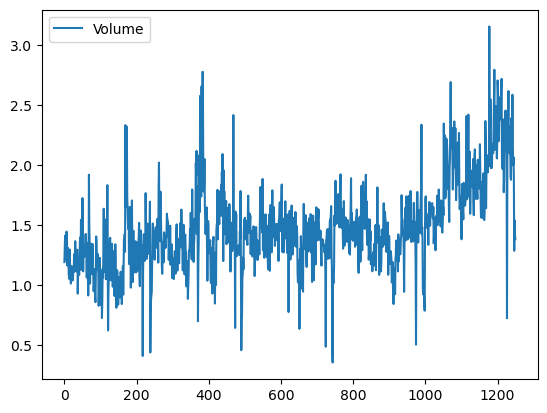

In [12]:
Smarket.plot(y='Volume');

##### Logistic Regression

In [13]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [14]:
results.params

intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [15]:
results.pvalues

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [16]:
probs = results.predict()
probs[:10]


array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [17]:
labels = np.array(['Down']*1250)
labels[probs>0.5] = "Up"

In [18]:
confusion_table(labels, Smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [19]:
(507+145)/1250, np.mean(labels == Smarket.Direction)

(0.5216, 0.5216)

In [20]:
train = (Smarket.Year < 2005)
Smarket_train = Smarket.loc[train]
Smarket_test = Smarket.loc[ train]
Smarket_test.shape

(998, 9)

In [21]:
X_train, X_test = X.loc[train], X.loc[ train]
y_train, y_test = y.loc[train], y.loc[ train]

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [22]:
D = Smarket.Direction
L_train, L_test = D.loc[train], D.loc[ train]

In [23]:
labels = np.array(['Down']*998)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,175,156
Up,316,351


In [24]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5270541082164328, 0.4729458917835671)

In [25]:
model = MS(['Lag1', 'Lag2']).fit(Smarket)
X = model.transform(Smarket)
X_train, X_test = X.loc[train], X.loc[ train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*998)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,168,160
Up,323,347


In [26]:
(35+106)/252,106/(106+76)

(0.5595238095238095, 0.5824175824175825)

In [27]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5],
                        'Lag2':[1.1,-0.8]});
newX = model.transform(newdata)
results.predict(newX)

0    0.479146
1    0.496094
dtype: float64

#####  Linear Discriminant Analysis

In [28]:
lda = LDA(store_covariance=True)

In [29]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, L_train)

,"solver solver: {'svd', 'lsqr', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'lsqr': Least squares solution. Can be combined with shrinkage or custom covariance estimator. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator... versionchanged:: 1.2 `solver=""svd""` now has experimental Array API support. See the :ref:`Array API User Guide ` for more details.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter.This should be left to None if `covariance_estimator` is used.Note that shrinkage works only with 'lsqr' and 'eigen' solvers.For a usage example, see:ref:`sphx_glr_auto_examples_classification_plot_lda.py`.",None
,"priors priors: array-like of shape (n_classes,), default=NoneThe class prior probabilities. By default, the class proportions areinferred from the training data.",None
,"n_components n_components: int, default=NoneNumber of components (<= min(n_classes - 1, n_features)) fordimensionality reduction. If None, will be set tomin(n_classes - 1, n_features). This parameter only affects the`transform` method.For a usage example, see:ref:`sphx_glr_auto_examples_decomposition_plot_pca_vs_lda.py`.",None
,"store_covariance store_covariance: bool, default=FalseIf True, explicitly compute the weighted within-class covariancematrix when solver is 'svd'. The matrix is always computedand stored for the other solvers... versionadded:: 0.17",True
,"tol tol: float, default=1.0e-4Absolute threshold for a singular value of X to be consideredsignificant, used to estimate the rank of X. Dimensions whosesingular values are non-significant are discarded. Only used ifsolver is 'svd'... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimatethe covariance matrices instead of relying on the empiricalcovariance estimator (with potential shrinkage).The object should have a fit method and a ``covariance_`` attributelike the estimators in :mod:`sklearn.covariance`.if None the shrinkage parameter drives the estimate.This should be left to None if `shrinkage` is used.Note that `covariance_estimator` works only with 'lsqr' and 'eigen'solvers... versionadded:: 0.24",None


In [30]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [31]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [32]:
lda.priors_

array([0.49198397, 0.50801603])

In [33]:
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

In [34]:
lda_pred = lda.predict(X_test)

In [35]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,168,160
Up,323,347


In [36]:
lda_prob = lda.predict_proba(X_test)
np.all(
    np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
    )

True

In [37]:
np.all(
    [lda.classes_[i] for i in np.argmax(lda_prob, 1)] == 
    lda_pred
    )

True

In [38]:
np.sum(lda_prob[:,0] > 0.9)

0

##### Quadratic Discriminant Analysis

In [39]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

,"solver solver: {'svd', 'eigen'}, default='svd'Solver to use, possible values: - 'svd': Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features. - 'eigen': Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.",'svd'
,"shrinkage shrinkage: 'auto' or float, default=NoneShrinkage parameter, possible values: - None: no shrinkage (default). - 'auto': automatic shrinkage using the Ledoit-Wolf lemma. - float between 0 and 1: fixed shrinkage parameter. Enabling shrinkage is expected to improve the model when some classes have a relatively small number of training data points compared to the number of features by mitigating overfitting during the covariance estimation step.This should be left to `None` if `covariance_estimator` is used.Note that shrinkage works only with 'eigen' solver.",None
,"priors priors: array-like of shape (n_classes,), default=NoneClass priors. By default, the class proportions are inferred from thetraining data.",None
,"reg_param reg_param: float, default=0.0Regularizes the per-class covariance estimates by transforming S2 as``S2 = (1 - reg_param) * S2 + reg_param * np.eye(n_features)``,where S2 corresponds to the `scaling_` attribute of a given class.",0.0
,"store_covariance store_covariance: bool, default=FalseIf True, the class covariance matrices are explicitly computed andstored in the `self.covariance_` attribute... versionadded:: 0.17",True
,"tol tol: float, default=1.0e-4Absolute threshold for the covariance matrix to be considered rankdeficient after applying some regularization (see `reg_param`) to each`Sk` where `Sk` represents covariance matrix for k-th class. Thisparameter does not affect the predictions. It controls when a warningis raised if the covariance matrix is not full rank... versionadded:: 0.17",0.0001
,"covariance_estimator covariance_estimator: covariance estimator, default=NoneIf not None, `covariance_estimator` is used to estimate the covariancematrices instead of relying on the empirical covariance estimator(with potential shrinkage). The object should have a fit method anda ``covariance_`` attribute like the estimators in:mod:`sklearn.covariance`. If None the shrinkage parameter drives theestimate.This should be left to `None` if `shrinkage` is used.Note that `covariance_estimator` works only with the 'eigen' solver.",None


In [40]:
qda.means_, qda.priors_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([0.49198397, 0.50801603]))

In [41]:
qda.covariance_[0]

array([[ 1.50662277, -0.03924806],
       [-0.03924806,  1.53559498]])

In [42]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,162,156
Up,329,351


In [43]:
np.mean(qda_pred == L_test)

0.5140280561122245

##### Naive Bayes

In [44]:
NB = GaussianNB()
NB.fit(X_train, L_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [45]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [46]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [47]:
NB.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [48]:
NB.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [49]:
X_train[L_train == 'Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [50]:
X_train[L_train == 'Down'].var(ddof=0)

Lag1    1.503554
Lag2    1.532467
dtype: float64

In [51]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,154,147
Up,337,360


In [52]:
NB.predict_proba(X_test)[:5]

array([[0.49221294, 0.50778706],
       [0.50610738, 0.49389262],
       [0.51517229, 0.48482771],
       [0.49413149, 0.50586851],
       [0.49147627, 0.50852373]])

#####  K-Nearest Neighbors

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,491,0
Up,0,507


In [54]:
(83+43)/252, np.mean(knn1_pred == L_test)

(0.5, 1.0)

In [55]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred == L_test)

0.7545090180360722

In [56]:
Caravan = load_data('Caravan')
Purchase = Caravan.Purchase
Purchase.value_counts()

Purchase
No     5474
Yes     348
Name: count, dtype: int64

In [57]:
348 / 5822

0.05977327378907592

In [58]:
feature_df = Caravan.drop(columns=['Purchase'])

In [59]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

In [60]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [61]:
feature_std = pd.DataFrame(X_std,
                           columns=feature_df.columns);
feature_std.std()

MOSTYPE     1.000086
MAANTHUI    1.000086
MGEMOMV     1.000086
MGEMLEEF    1.000086
MOSHOOFD    1.000086
              ...   
AZEILPL     1.000086
APLEZIER    1.000086
AFIETS      1.000086
AINBOED     1.000086
ABYSTAND    1.000086
Length: 85, dtype: float64

In [62]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(feature_std,
                            Purchase,
                            test_size=1000,
                            random_state=0)

In [63]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_pred = knn1.fit(X_train, y_train).predict(X_test)
np.mean(y_test != knn1_pred), np.mean(y_test != "No")

(0.111, 0.067)

In [64]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [65]:
9/(53+9)

0.14516129032258066

In [66]:
for K in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    templ = ('K={0:d}: # predicted to rent: {1:>2},' +
             ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent = C.loc['Yes','Yes']
    print(templ.format(
        K,
        pred,
        did_rent,
        did_rent / pred))

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%


Comparison to Logistic Regression

In [67]:
logit = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > 5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,933,67
Yes,0,0


In [68]:
logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9


In [69]:
9/(20+9)

0.3103448275862069

Linear and Poisson Regression on the Bikeshare Data

In [70]:
Bike = load_data('Bikeshare')

In [71]:
Bike.shape, Bike.columns

((8645, 15),
 Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'bikers'],
       dtype='object'))

Linear Regression


In [72]:
X = MS(['mnth',
        'hr',
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
Y = Bike['bikers']
M_lm = sm.OLS(Y, X).fit()
summarize(M_lm)

,coef,std err,t,P>|t|
intercept,-68.6317,5.307,-12.932,0.000
mnth[Feb],6.8452,4.287,1.597,0.110
mnth[March],16.5514,4.301,3.848,0.000
mnth[April],41.4249,4.972,8.331,0.000
mnth[May],72.5571,5.641,12.862,0.000
mnth[June],67.8187,6.544,10.364,0.000
mnth[July],45.3245,7.081,6.401,0.000
mnth[Aug],53.2430,6.640,8.019,0.000
mnth[Sept],66.6783,5.925,11.254,0.000
mnth[Oct],75.8343,4.950,15.319,0.000


In [73]:
hr_encode = contrast('hr', 'sum')
mnth_encode = contrast('mnth', 'sum')

In [74]:
X2 = MS([mnth_encode,
        hr_encode,
        'workingday',
        'temp',
        'weathersit']).fit_transform(Bike)
M2_lm = sm.OLS(Y, X2).fit()
S2 = summarize(M2_lm)
S2

,coef,std err,t,P>|t|
intercept,73.5974,5.132,14.340,0.000
mnth[Jan],-46.0871,4.085,-11.281,0.000
mnth[Feb],-39.2419,3.539,-11.088,0.000
mnth[March],-29.5357,3.155,-9.361,0.000
mnth[April],-4.6622,2.741,-1.701,0.089
mnth[May],26.4700,2.851,9.285,0.000
mnth[June],21.7317,3.465,6.272,0.000
mnth[July],-0.7626,3.908,-0.195,0.845
mnth[Aug],7.1560,3.535,2.024,0.043
mnth[Sept],20.5912,3.046,6.761,0.000


In [75]:
np.sum((M_lm.fittedvalues- M2_lm.fittedvalues)**2)

3.834810583929654e-20

In [76]:
np.allclose(M_lm.fittedvalues, M2_lm.fittedvalues)

True

In [77]:
coef_month = S2[S2.index.str.contains('mnth')]['coef']
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
Name: coef, dtype: float64

In [78]:
months = Bike['mnth'].dtype.categories
coef_month = pd.concat([
    coef_month,
    pd.Series([-coef_month.sum()],
              index=['mnth[Dec]'
                     ])
                     ])
coef_month

mnth[Jan]     -46.0871
mnth[Feb]     -39.2419
mnth[March]   -29.5357
mnth[April]    -4.6622
mnth[May]      26.4700
mnth[June]     21.7317
mnth[July]     -0.7626
mnth[Aug]       7.1560
mnth[Sept]     20.5912
mnth[Oct]      29.7472
mnth[Nov]      14.2229
mnth[Dec]       0.3705
dtype: float64

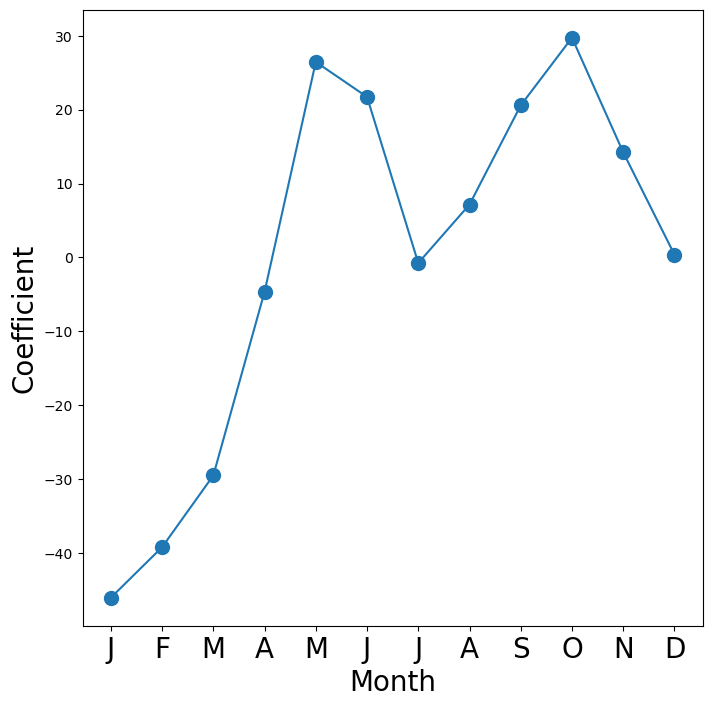

In [79]:
fig_month, ax_month = subplots(figsize=(8,8))
x_month = np.arange(coef_month.shape[0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
                         =20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20);

In [81]:
coef_hr = S2[S2.index.str.contains('hr')]['coef']
coef_hr = coef_hr.reindex(['hr[{0}]'.format(h) for h in range(23)])
coef_hr = pd.concat([coef_hr, 
                     pd.Series([-coef_hr.sum()], index=['hr[23]'])
                     ])

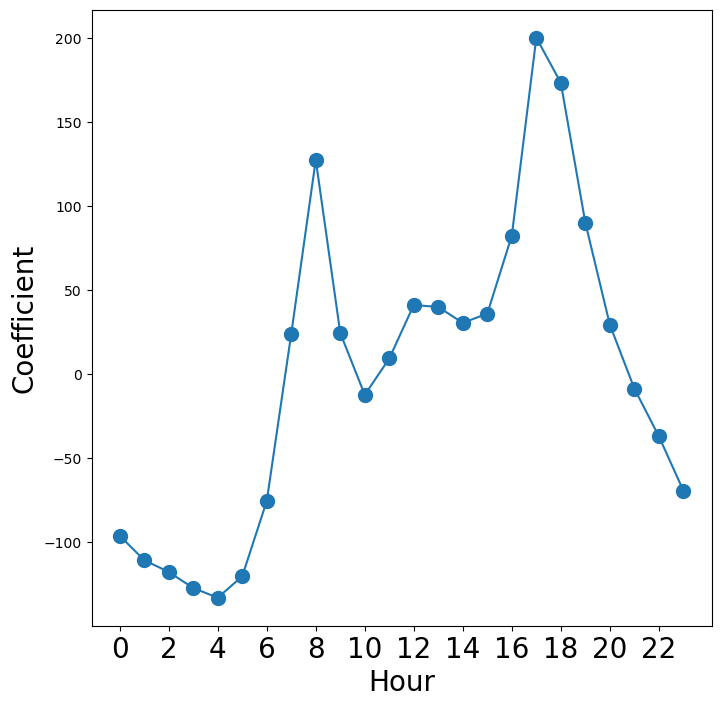

In [82]:
fig_hr, ax_hr = subplots(figsize=(8,8))
x_hr = np.arange(coef_hr.shape[0])
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticks(x_hr[::2])
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);

Poisson Regression

In [83]:
M_pois = sm.GLM(Y, X2, family=sm.families.Poisson()).fit()

In [84]:
S_pois = summarize(M_pois)
coef_month = S_pois[S_pois.index.str.contains('mnth')]['coef']
coef_month = pd.concat([coef_month,
                        pd.Series([-coef_month.sum()],
                                  index=['mnth[Dec]'])])
coef_hr = S_pois[S_pois.index.str.contains('hr')]['coef']
coef_hr = pd.concat([coef_hr,
                     pd.Series([-coef_hr.sum()],
                               index=['hr[23]'])])

C:\Users\Zoe Oladokun\AppData\Local\Temp\ipykernel_48688\2540400579.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hr.set_xticklabels(range(24)[::2], fontsize=20)


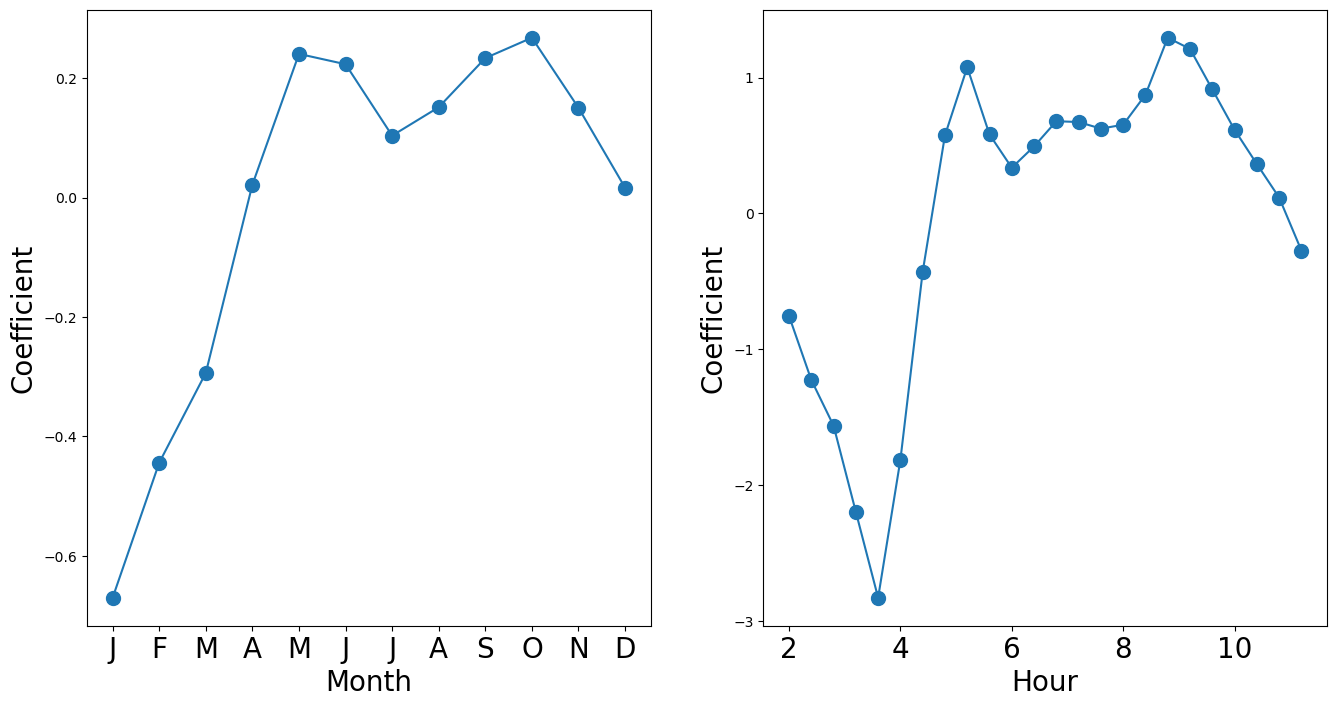

In [85]:
fig_pois, (ax_month, ax_hr) = subplots(1, 2, figsize=(16,8))
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels([l[5] for l in coef_month.index], fontsize
                         =20)
ax_month.set_xlabel('Month', fontsize=20)
ax_month.set_ylabel('Coefficient', fontsize=20)
ax_hr.plot(x_hr, coef_hr, marker='o', ms=10)
ax_hr.set_xticklabels(range(24)[::2], fontsize=20)
ax_hr.set_xlabel('Hour', fontsize=20)
ax_hr.set_ylabel('Coefficient', fontsize=20);

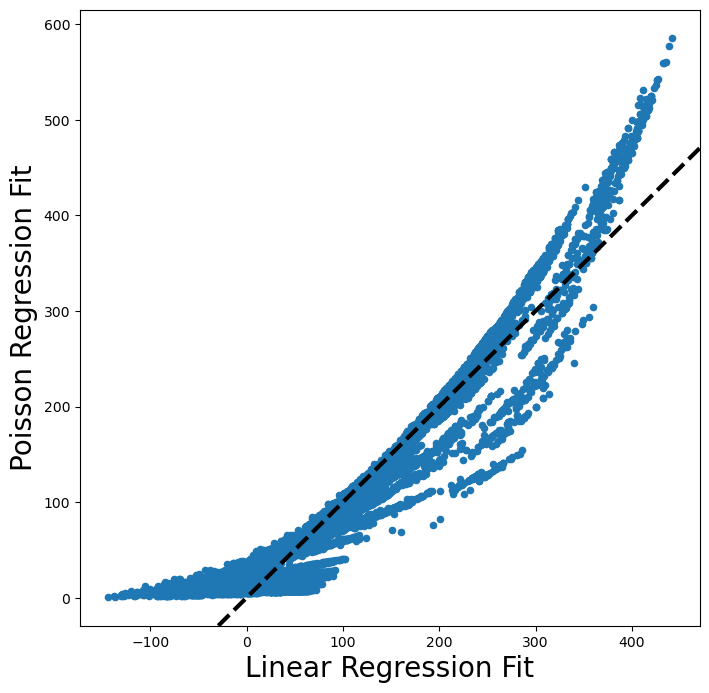

In [86]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(M2_lm.fittedvalues,
           M_pois.fittedvalues,
           s=20)
ax.set_xlabel('Linear Regression Fit', fontsize=20)
ax.set_ylabel('Poisson Regression Fit', fontsize=20)
ax.axline([0,0], c='black', linewidth=3,
          linestyle='--', slope=1);


####  Exercises

Conceptual


1.  Using a little bit of algebra, prove that $
p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}
$ (4.2) is equivalent to $
\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}
$ (4.3). In other words, the logistic function representation and logit represen
tation for the logistic regression model are equivalent.

**Given:** The logistic function representation
$$p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

**To prove:** This is equivalent to the logit representation
$$\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$


**Starting from equation (4.2):**

$$p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

**First, find $1 - p(X)$:**

$$1 - p(X) = 1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$= \frac{1 + e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$= \frac{1 + e^{\beta_0 + \beta_1 X} - e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$= \frac{1}{1 + e^{\beta_0 + \beta_1 X}}$$

**Now compute the odds ratio $\frac{p(X)}{1-p(X)}$:**

$$\frac{p(X)}{1 - p(X)} = \frac{\frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}}{\frac{1}{1 + e^{\beta_0 + \beta_1 X}}}$$

$$= \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \cdot \frac{1 + e^{\beta_0 + \beta_1 X}}{1}$$

$$= e^{\beta_0 + \beta_1 X}$$

Therefore, we have shown that equation (4.2) implies equation (4.3).


The logit (log-odds) is linear in X, which is why we call this *logistic regression* even though $p(X)$ itself is a nonlinear function of X.

2. It was stated in the text that classifying an observation to the class
for which $
p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_k)^2\right)}{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_l)^2\right)}
$ (4.17) is largest is equivalent to classifying an observation
to the class for which $
\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)
$ (4.18) is largest. Prove that this is the case. In
other words, under the assumption that the observations in the kth
class are drawn from a $ N(\mu_k, \sigma^2) $ distribution, the Bayes classifier
assigns an observation to the class for which the discriminant function
is maximized.

**Given:** The posterior probability
$$p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_k)^2\right)}{\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_l)^2\right)}$$

**To prove:** Maximizing $p_k(x)$ over $k$ is equivalent to maximizing
$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$$


**Step 1: Observe that the denominator is the same for all classes**

Since the denominator $\sum_{l=1}^{K} \pi_l \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_l)^2\right)$ doesn't depend on which class $k$ we're considering, maximizing $p_k(x)$ is equivalent to maximizing just the numerator:

$$\pi_k \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_k)^2\right)$$

**Step 2: Apply the logarithm**

Since the logarithm is a monotonically increasing function, maximizing the numerator is equivalent to maximizing its logarithm:

$$\log\left[\pi_k \frac{1}{\sqrt{2\pi \sigma}} \exp\left(-\frac{1}{2\sigma^2}(x - \mu_k)^2\right)\right]$$

**Step 3: Simplify using logarithm properties**

$$= \log(\pi_k) + \log\left(\frac{1}{\sqrt{2\pi \sigma}}\right) + \log\left[\exp\left(-\frac{1}{2\sigma^2}(x - \mu_k)^2\right)\right]$$

$$= \log(\pi_k) + \log\left(\frac{1}{\sqrt{2\pi \sigma}}\right) - \frac{1}{2\sigma^2}(x - \mu_k)^2$$

**Step 4: Drop constant terms**

The term $\log\left(\frac{1}{\sqrt{2\pi \sigma}}\right) = -\frac{1}{2}\log(2\pi\sigma^2)$ is the same for all classes, so it doesn't affect which class has the maximum. We can drop it:

$$\log(\pi_k) - \frac{1}{2\sigma^2}(x - \mu_k)^2$$

**Step 5: Expand the quadratic term**

$$= \log(\pi_k) - \frac{1}{2\sigma^2}(x^2 - 2x\mu_k + \mu_k^2)$$

$$= \log(\pi_k) - \frac{x^2}{2\sigma^2} + \frac{2x\mu_k}{2\sigma^2} - \frac{\mu_k^2}{2\sigma^2}$$

$$= \log(\pi_k) - \frac{x^2}{2\sigma^2} + \frac{x\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2}$$

**Step 6: Drop the term that doesn't depend on k**

The term $-\frac{x^2}{2\sigma^2}$ is the same for all classes (doesn't depend on $k$), so we can drop it:

$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$$

This is exactly equation (4.18).

3. This problem relates to the QDA model, in which the observations
within each class are drawn from a normal distribution with a class
specific mean vector and a class specific covariance matrix. We con
sider the simple case where p =1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs
to the kth class then X comes from a one-dimensional normal dis
tribution, X 
N(µk, 2
k). Recall that the density function for the
one-dimensional normal distribution is given in (4.16). Prove that in
this case, the Bayes classifier is not linear. Argue that it is in fact
quadratic.
Hint: For this problem, you should follow the arguments laid out in
Section 4.4.1, but without making the assumption that 2
1 = ···= 2
K.

4. When the number of features p is large, there tends to be a deteri
oration in the performance of KNN and other local approaches that
perform prediction using only observations that are near the test ob
servation for which a prediction must be made. This phenomenon is
known as the curse of dimensionality, and it ties into the fact that curse of di
non-parametric approaches often perform poorly when p is large. We
will now investigate this curse.

(a) Suppose that we have a set of observations, each with measure
ments on p =1 feature, X. We assume that X is uniformly
(evenly) distributed on [0,1]. Associated with each observation
is a response value. Suppose that we wish to predict a test obser
vation’s response using only observations that are within 10% of
the range of X closest to that test observation. For instance, in
order to predict the response for a test observation with X =0.6,
we will use observations in the range [0.55,0.65]. On average,
what fraction of the available observations will we use to make
the prediction?

(b) Now suppose that we have a set of observations, each with
measurements on p =2features, X1 and X2. We assume that
(X1,X2) are uniformly distributed on [0,1] [0,1]. We wish to
predict a test observation’s response using only observations that
are within 10% of the range of X1 and within 10% of the range
of X2 closest to that test observation. For instance, in order to
predict the response for a test observation with X1 =0.6 and
X2 =0.35, we will use observations in the range [0.55,0.65] for
X1 and in the range [0.3,0.4] for X2. On average, what fraction
of the available observations will we use to make the prediction?

(c) Now suppose that we have a set of observations on p = 100 fea
tures. Again the observations are uniformly distributed on each
feature, and again each feature ranges in value from 0 to 1. We
wish to predict a test observation’s response using observations
within the 10% of each feature’s range that is closest to that test
observation. What fraction of the available observations will we
use to make the prediction?

(d) Using your answers to parts (a)–(c), argue that a drawback of
KNN when p is large is that there are very few training obser
vations “near” any given test observation.

(e) Now suppose that we wish to make a prediction for a test obser
vation by creating a p-dimensional hypercube centered around
the test observation that contains, on average, 10% of the train
ing observations. For p =1,2, and 100, what is the length of each
side of the hypercube? Comment on your answer.

Note: A hypercube is a generalization of a cube to an arbitrary
number of dimensions. When p =1, a hypercube is simply a line
segment, when p =2 it is a square, and when p = 100 it is a
100-dimensional cube.

5. We now examine the differences between LDA and QDA.

(a) If the Bayes decision boundary is linear, do we expect LDA or
QDA to perform better on the training set? On the test set?




(b) If the Bayes decision boundary is non-linear, do we expect LDA
or QDA to perform better on the training set? On the test set?

(c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline,
or be unchanged? Why?

(d) True or False: Even if the Bayes decision boundary for a given
problem is linear, we will probably achieve a superior test er
ror rate using QDA rather than LDA because QDA is flexible
enough to model a linear decision boundary. Justify your answer

6. Suppose we collect data for a group of students in a statistics class with variables X1 =hours studied, X2=undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, b0 = 6, b1 =0.05, b2 =1.

(a) Estimate the probability that a student who studies for 40h and
has an undergrad GPA of 3.5 gets an A in the class.

(b) How many hours would the student in part (a) need to study to
have a 50% chance of getting an A in the class?

7. Suppose that we wish to predict whether a given stock will issue a
dividend this year (“Yes” or “No”) based on X, last year’s percent
profit. We examine a large number of companies and discover that the
mean value of X for companies that issued a dividend was ¯X = 10,
while the mean for those that didn’t was ¯X =0. In addition, the
variance of X for these two sets of companies was ˆ2 = 36. Finally,
80% of companies issued dividends. Assuming that X follows a nor
mal distribution, predict the probability that a company will issue
a dividend this year given that its percentage profit was X =4last
year.

Hint: Recall that the density function for a normal random variable
is f(x)= 1
2 2
e (x µ)2/2 2. You will need to use Bayes’ theorem.

8. Suppose that we take a data set, divide it into equally-sized training
and test sets, and then try out two different classification procedures.
First we use logistic regression and get an error rate of 20% on the
training data and 30% on the test data. Next we use 1-nearest neigh
bors (i.e. K =1) and get an average error rate (averaged over both
test and training data sets) of 18%. Based on these results, which
method should we prefer to use for classification of new observations?
Why?

9. This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?


(b) Suppose that an individual has a 16% chance of defaulting on
her credit card payment. What are the odds that she will de
fault?


10. Equation 4.32 derived an expression for log Pr(Y=k|X=x)
Pr(Y =K|X=x) in the setting where p>1, so that the mean for the kth class, µk, is a p
dimensional vector, and the shared covariance 
is a p p matrix.
However, in the setting with p =1,(4.32) takes a simpler form, since
the means µ1,...,µK and the variance 2 are scalars. In this simpler
setting, repeat the calculation in (4.32), and provide expressions for ak and bkj in terms of k, K, µk, µK, and 2.

11. Work out the detailed forms of ak, bkj, and bkjl in (4.33). Your answer should involve k, K, µk, µK, k, and K.

12. Suppose that you wish to classify an observation X R into apples
and oranges. You fit a logistic regression model and find that
Pr(Y = orange|X = x)= exp(ˆ0 + ˆ1x)
1 +exp(ˆ0 + ˆ1x).
Your friend fits a logistic regression model to the same data using the
softmax formulation in (4.13), and finds that
Pr(Y = orange|X = x)=
exp(ˆorange0 +ˆorange1x)
exp(ˆorange0 +ˆorange1x) + exp(ˆapple0 +ˆapple1x) .
(a) What is the log odds of orange versus apple in your model?

(b) What is the log odds of orange versus apple in your friend’s
model?

(c) Suppose that in your model, ˆ0 =2and ˆ1 = 1. What are
the coefficient estimates in your friend’s model? Be as specific
as possible.

(d) Now suppose that you and your friend fit the same two models
on a different data set. This time, your friend gets the coefficient
estimates ˆorange0 =1.2, ˆorange1 = 2, ˆorange0 =3, ˆorange1 =
0.6. What are the coefficient estimates in your model?

(e) Finally, suppose you apply both models from (d) to a data set
with 2,000 test observations. What fraction of the time do you
expect the predicted class labels from your model to agree with
those from your friend’s model? Explain your answer.

Applied


13. This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?


(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

(d) Nowfitthe logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K =1.

(h) Repeat (d) using naive Bayes.

(i) Which of these methods appears to provide the best results on
this data?